In [1]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [2]:
# 資料處理概念
# int(float("%.2f" % 0.123456789) * 100) in range(-100, 100 + 1)
# print(np.array(range(-100, 100)).tolist().index(int(float("%.2f" % 0.123456789) * 100)))
# print(np.array(range(-100, 100)).tolist()[112])
# print(int(float("%.2f" % 0.123456789) * 100))
# print(np.array(range(-100, 100)).tolist()[0])

# [100] = 0, [0] = -100, [200] = 100

# 改小數點後三為

In [3]:
data_connect_size = 128

In [4]:
def y_encode(data):
    encode_data = []
    
    #is negative number
    index_format = np.array(range(-1000, 1001)).tolist()
    
    for i in data:
        tmp = np.zeros(2002)
        # 1 -> 10.000 -> 10000
        search = i
        
        search = 0.1 if search > 0.1 else search
        search = -0.1 if search < -0.1 else search
        
        search = int(float("%.4f" % search) * 10000)
        
        key = index_format.index(search)
        
        tmp[key] = 1
        
        encode_data.append(tmp)
        
    return np.array(encode_data)

In [5]:
def y_decode(data):
    decode_data = []
    
    for i in data:
        index = np.array(i).argmax()
    
        index = index - 1000

        index = index / 1000
        
        decode_data.append(index)
    
    return decode_data

In [6]:
y_encode([1, 2, 3, 4, 0.5])

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [7]:
y_decode(y_encode([1, 0.0002, 0.003, 0.3, 0.5]))

[1.0, 0.002, 0.029999999999999999, 1.0, 1.0]

In [8]:
def x_encode(data):
    encode_data = []
    
    for i in data:
        if i > 0:
            tmp = [i, 0]
        else:
            tmp = [0, i]
        
        encode_data.append(tmp)
        
    return np.array(encode_data)

In [9]:
def connect_size_encode(dataset):
    data_connect_size = 128
    dataset = np.array(dataset, copy=True)
    
    a = dataset[(len(dataset) - data_connect_size):len(dataset)]
    b = np.zeros(128)
    
    b[(len(b) - len(a)):len(b)] = a[:]
    
    return b

In [10]:
def size_full_encode(dataset):
    return_value = []
    
    for index, value in enumerate(dataset):
        print(index, len(dataset))
        
        tmp = connect_size_encode(dataset[:index + 1])
        return_value.append(x_encode(tmp))
        
    return return_value

In [11]:
connect_size_encode([1, 2, 3, 4, 5, 6, 7, 8, 9])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [12]:
size_full_encode([1, 2, 3, 4, 5, 6, 7, 8, 9])

0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9


[array([[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],


In [13]:
max_length = 0

In [14]:
y_rate, y_data = [[None] * 2] * 2

for i in range(2):
    file_path = os.sep.join([os.path.expanduser("~lewis"), "wave_test", "dataset", str(i + 1) + ".wav"]);
    y_rate[i], y_data[i] = wavfile.read(file_path)
    
    if y_data[i].shape[0] > max_length:
        max_length = y_data[i].shape[0]

/usr/local/lib/python3.4/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [15]:
### 目前僅讀取 y_data[0] 的 x 資料

x_rate, x_data = [[None] * 4] * 2

for i in range(4):
    file_path = os.sep.join([os.path.expanduser("~lewis"), "wave_test", "dataset", "1", str(i + 1) + ".wav"]);
    x_rate[i], x_data[i] = wavfile.read(file_path)
    
    if x_data[i].shape[0] > max_length:
        max_length = x_data[i].shape[0]

/usr/local/lib/python3.4/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [16]:
max_length

28814

In [17]:
# y format

data_format = np.zeros([max_length])

for i, data in enumerate(y_data):
    tmp_format = np.array(data_format, copy=True)
    tmp_format[:len(y_data[i])] = [i[0] for i in y_data[i]]
    
    y_data[i] = y_encode(tmp_format)
    
y_data = np.array(y_data)

In [18]:
# x format

data_format = np.zeros([max_length])

for i, data in enumerate(x_data):
    tmp_format = np.array(data_format, copy=True)
    tmp_format[:len(x_data[i])] = [i[0] for i in x_data[i]]
    
    x_data[i] = size_full_encode(tmp_format)
    
x_data = np.array(x_data)

0 28814
1 28814
2 28814
3 28814
4 28814
5 28814
6 28814
7 28814
8 28814
9 28814
10 28814
11 28814
12 28814
13 28814
14 28814
15 28814
16 28814
17 28814
18 28814
19 28814
20 28814
21 28814
22 28814
23 28814
24 28814
25 28814
26 28814
27 28814
28 28814
29 28814
30 28814
31 28814
32 28814
33 28814
34 28814
35 28814
36 28814
37 28814
38 28814
39 28814
40 28814
41 28814
42 28814
43 28814
44 28814
45 28814
46 28814
47 28814
48 28814
49 28814
50 28814
51 28814
52 28814
53 28814
54 28814
55 28814
56 28814
57 28814
58 28814
59 28814
60 28814
61 28814
62 28814
63 28814
64 28814
65 28814
66 28814
67 28814
68 28814
69 28814
70 28814
71 28814
72 28814
73 28814
74 28814
75 28814
76 28814
77 28814
78 28814
79 28814
80 28814
81 28814
82 28814
83 28814
84 28814
85 28814
86 28814
87 28814
88 28814
89 28814
90 28814
91 28814
92 28814
93 28814
94 28814
95 28814
96 28814
97 28814
98 28814
99 28814
100 28814
101 28814
102 28814
103 28814
104 28814
105 28814
106 28814
107 28814
108 28814
109 28814
110 28814


1128 28814
1129 28814
1130 28814
1131 28814
1132 28814
1133 28814
1134 28814
1135 28814
1136 28814
1137 28814
1138 28814
1139 28814
1140 28814
1141 28814
1142 28814
1143 28814
1144 28814
1145 28814
1146 28814
1147 28814
1148 28814
1149 28814
1150 28814
1151 28814
1152 28814
1153 28814
1154 28814
1155 28814
1156 28814
1157 28814
1158 28814
1159 28814
1160 28814
1161 28814
1162 28814
1163 28814
1164 28814
1165 28814
1166 28814
1167 28814
1168 28814
1169 28814
1170 28814
1171 28814
1172 28814
1173 28814
1174 28814
1175 28814
1176 28814
1177 28814
1178 28814
1179 28814
1180 28814
1181 28814
1182 28814
1183 28814
1184 28814
1185 28814
1186 28814
1187 28814
1188 28814
1189 28814
1190 28814
1191 28814
1192 28814
1193 28814
1194 28814
1195 28814
1196 28814
1197 28814
1198 28814
1199 28814
1200 28814
1201 28814
1202 28814
1203 28814
1204 28814
1205 28814
1206 28814
1207 28814
1208 28814
1209 28814
1210 28814
1211 28814
1212 28814
1213 28814
1214 28814
1215 28814
1216 28814
1217 28814
1218 28814

2286 28814
2287 28814
2288 28814
2289 28814
2290 28814
2291 28814
2292 28814
2293 28814
2294 28814
2295 28814
2296 28814
2297 28814
2298 28814
2299 28814
2300 28814
2301 28814
2302 28814
2303 28814
2304 28814
2305 28814
2306 28814
2307 28814
2308 28814
2309 28814
2310 28814
2311 28814
2312 28814
2313 28814
2314 28814
2315 28814
2316 28814
2317 28814
2318 28814
2319 28814
2320 28814
2321 28814
2322 28814
2323 28814
2324 28814
2325 28814
2326 28814
2327 28814
2328 28814
2329 28814
2330 28814
2331 28814
2332 28814
2333 28814
2334 28814
2335 28814
2336 28814
2337 28814
2338 28814
2339 28814
2340 28814
2341 28814
2342 28814
2343 28814
2344 28814
2345 28814
2346 28814
2347 28814
2348 28814
2349 28814
2350 28814
2351 28814
2352 28814
2353 28814
2354 28814
2355 28814
2356 28814
2357 28814
2358 28814
2359 28814
2360 28814
2361 28814
2362 28814
2363 28814
2364 28814
2365 28814
2366 28814
2367 28814
2368 28814
2369 28814
2370 28814
2371 28814
2372 28814
2373 28814
2374 28814
2375 28814
2376 28814

3392 28814
3393 28814
3394 28814
3395 28814
3396 28814
3397 28814
3398 28814
3399 28814
3400 28814
3401 28814
3402 28814
3403 28814
3404 28814
3405 28814
3406 28814
3407 28814
3408 28814
3409 28814
3410 28814
3411 28814
3412 28814
3413 28814
3414 28814
3415 28814
3416 28814
3417 28814
3418 28814
3419 28814
3420 28814
3421 28814
3422 28814
3423 28814
3424 28814
3425 28814
3426 28814
3427 28814
3428 28814
3429 28814
3430 28814
3431 28814
3432 28814
3433 28814
3434 28814
3435 28814
3436 28814
3437 28814
3438 28814
3439 28814
3440 28814
3441 28814
3442 28814
3443 28814
3444 28814
3445 28814
3446 28814
3447 28814
3448 28814
3449 28814
3450 28814
3451 28814
3452 28814
3453 28814
3454 28814
3455 28814
3456 28814
3457 28814
3458 28814
3459 28814
3460 28814
3461 28814
3462 28814
3463 28814
3464 28814
3465 28814
3466 28814
3467 28814
3468 28814
3469 28814
3470 28814
3471 28814
3472 28814
3473 28814
3474 28814
3475 28814
3476 28814
3477 28814
3478 28814
3479 28814
3480 28814
3481 28814
3482 28814

4501 28814
4502 28814
4503 28814
4504 28814
4505 28814
4506 28814
4507 28814
4508 28814
4509 28814
4510 28814
4511 28814
4512 28814
4513 28814
4514 28814
4515 28814
4516 28814
4517 28814
4518 28814
4519 28814
4520 28814
4521 28814
4522 28814
4523 28814
4524 28814
4525 28814
4526 28814
4527 28814
4528 28814
4529 28814
4530 28814
4531 28814
4532 28814
4533 28814
4534 28814
4535 28814
4536 28814
4537 28814
4538 28814
4539 28814
4540 28814
4541 28814
4542 28814
4543 28814
4544 28814
4545 28814
4546 28814
4547 28814
4548 28814
4549 28814
4550 28814
4551 28814
4552 28814
4553 28814
4554 28814
4555 28814
4556 28814
4557 28814
4558 28814
4559 28814
4560 28814
4561 28814
4562 28814
4563 28814
4564 28814
4565 28814
4566 28814
4567 28814
4568 28814
4569 28814
4570 28814
4571 28814
4572 28814
4573 28814
4574 28814
4575 28814
4576 28814
4577 28814
4578 28814
4579 28814
4580 28814
4581 28814
4582 28814
4583 28814
4584 28814
4585 28814
4586 28814
4587 28814
4588 28814
4589 28814
4590 28814
4591 28814

5614 28814
5615 28814
5616 28814
5617 28814
5618 28814
5619 28814
5620 28814
5621 28814
5622 28814
5623 28814
5624 28814
5625 28814
5626 28814
5627 28814
5628 28814
5629 28814
5630 28814
5631 28814
5632 28814
5633 28814
5634 28814
5635 28814
5636 28814
5637 28814
5638 28814
5639 28814
5640 28814
5641 28814
5642 28814
5643 28814
5644 28814
5645 28814
5646 28814
5647 28814
5648 28814
5649 28814
5650 28814
5651 28814
5652 28814
5653 28814
5654 28814
5655 28814
5656 28814
5657 28814
5658 28814
5659 28814
5660 28814
5661 28814
5662 28814
5663 28814
5664 28814
5665 28814
5666 28814
5667 28814
5668 28814
5669 28814
5670 28814
5671 28814
5672 28814
5673 28814
5674 28814
5675 28814
5676 28814
5677 28814
5678 28814
5679 28814
5680 28814
5681 28814
5682 28814
5683 28814
5684 28814
5685 28814
5686 28814
5687 28814
5688 28814
5689 28814
5690 28814
5691 28814
5692 28814
5693 28814
5694 28814
5695 28814
5696 28814
5697 28814
5698 28814
5699 28814
5700 28814
5701 28814
5702 28814
5703 28814
5704 28814

6758 28814
6759 28814
6760 28814
6761 28814
6762 28814
6763 28814
6764 28814
6765 28814
6766 28814
6767 28814
6768 28814
6769 28814
6770 28814
6771 28814
6772 28814
6773 28814
6774 28814
6775 28814
6776 28814
6777 28814
6778 28814
6779 28814
6780 28814
6781 28814
6782 28814
6783 28814
6784 28814
6785 28814
6786 28814
6787 28814
6788 28814
6789 28814
6790 28814
6791 28814
6792 28814
6793 28814
6794 28814
6795 28814
6796 28814
6797 28814
6798 28814
6799 28814
6800 28814
6801 28814
6802 28814
6803 28814
6804 28814
6805 28814
6806 28814
6807 28814
6808 28814
6809 28814
6810 28814
6811 28814
6812 28814
6813 28814
6814 28814
6815 28814
6816 28814
6817 28814
6818 28814
6819 28814
6820 28814
6821 28814
6822 28814
6823 28814
6824 28814
6825 28814
6826 28814
6827 28814
6828 28814
6829 28814
6830 28814
6831 28814
6832 28814
6833 28814
6834 28814
6835 28814
6836 28814
6837 28814
6838 28814
6839 28814
6840 28814
6841 28814
6842 28814
6843 28814
6844 28814
6845 28814
6846 28814
6847 28814
6848 28814

7905 28814
7906 28814
7907 28814
7908 28814
7909 28814
7910 28814
7911 28814
7912 28814
7913 28814
7914 28814
7915 28814
7916 28814
7917 28814
7918 28814
7919 28814
7920 28814
7921 28814
7922 28814
7923 28814
7924 28814
7925 28814
7926 28814
7927 28814
7928 28814
7929 28814
7930 28814
7931 28814
7932 28814
7933 28814
7934 28814
7935 28814
7936 28814
7937 28814
7938 28814
7939 28814
7940 28814
7941 28814
7942 28814
7943 28814
7944 28814
7945 28814
7946 28814
7947 28814
7948 28814
7949 28814
7950 28814
7951 28814
7952 28814
7953 28814
7954 28814
7955 28814
7956 28814
7957 28814
7958 28814
7959 28814
7960 28814
7961 28814
7962 28814
7963 28814
7964 28814
7965 28814
7966 28814
7967 28814
7968 28814
7969 28814
7970 28814
7971 28814
7972 28814
7973 28814
7974 28814
7975 28814
7976 28814
7977 28814
7978 28814
7979 28814
7980 28814
7981 28814
7982 28814
7983 28814
7984 28814
7985 28814
7986 28814
7987 28814
7988 28814
7989 28814
7990 28814
7991 28814
7992 28814
7993 28814
7994 28814
7995 28814

9075 28814
9076 28814
9077 28814
9078 28814
9079 28814
9080 28814
9081 28814
9082 28814
9083 28814
9084 28814
9085 28814
9086 28814
9087 28814
9088 28814
9089 28814
9090 28814
9091 28814
9092 28814
9093 28814
9094 28814
9095 28814
9096 28814
9097 28814
9098 28814
9099 28814
9100 28814
9101 28814
9102 28814
9103 28814
9104 28814
9105 28814
9106 28814
9107 28814
9108 28814
9109 28814
9110 28814
9111 28814
9112 28814
9113 28814
9114 28814
9115 28814
9116 28814
9117 28814
9118 28814
9119 28814
9120 28814
9121 28814
9122 28814
9123 28814
9124 28814
9125 28814
9126 28814
9127 28814
9128 28814
9129 28814
9130 28814
9131 28814
9132 28814
9133 28814
9134 28814
9135 28814
9136 28814
9137 28814
9138 28814
9139 28814
9140 28814
9141 28814
9142 28814
9143 28814
9144 28814
9145 28814
9146 28814
9147 28814
9148 28814
9149 28814
9150 28814
9151 28814
9152 28814
9153 28814
9154 28814
9155 28814
9156 28814
9157 28814
9158 28814
9159 28814
9160 28814
9161 28814
9162 28814
9163 28814
9164 28814
9165 28814

10202 28814
10203 28814
10204 28814
10205 28814
10206 28814
10207 28814
10208 28814
10209 28814
10210 28814
10211 28814
10212 28814
10213 28814
10214 28814
10215 28814
10216 28814
10217 28814
10218 28814
10219 28814
10220 28814
10221 28814
10222 28814
10223 28814
10224 28814
10225 28814
10226 28814
10227 28814
10228 28814
10229 28814
10230 28814
10231 28814
10232 28814
10233 28814
10234 28814
10235 28814
10236 28814
10237 28814
10238 28814
10239 28814
10240 28814
10241 28814
10242 28814
10243 28814
10244 28814
10245 28814
10246 28814
10247 28814
10248 28814
10249 28814
10250 28814
10251 28814
10252 28814
10253 28814
10254 28814
10255 28814
10256 28814
10257 28814
10258 28814
10259 28814
10260 28814
10261 28814
10262 28814
10263 28814
10264 28814
10265 28814
10266 28814
10267 28814
10268 28814
10269 28814
10270 28814
10271 28814
10272 28814
10273 28814
10274 28814
10275 28814
10276 28814
10277 28814
10278 28814
10279 28814
10280 28814
10281 28814
10282 28814
10283 28814
10284 28814
1028

11356 28814
11357 28814
11358 28814
11359 28814
11360 28814
11361 28814
11362 28814
11363 28814
11364 28814
11365 28814
11366 28814
11367 28814
11368 28814
11369 28814
11370 28814
11371 28814
11372 28814
11373 28814
11374 28814
11375 28814
11376 28814
11377 28814
11378 28814
11379 28814
11380 28814
11381 28814
11382 28814
11383 28814
11384 28814
11385 28814
11386 28814
11387 28814
11388 28814
11389 28814
11390 28814
11391 28814
11392 28814
11393 28814
11394 28814
11395 28814
11396 28814
11397 28814
11398 28814
11399 28814
11400 28814
11401 28814
11402 28814
11403 28814
11404 28814
11405 28814
11406 28814
11407 28814
11408 28814
11409 28814
11410 28814
11411 28814
11412 28814
11413 28814
11414 28814
11415 28814
11416 28814
11417 28814
11418 28814
11419 28814
11420 28814
11421 28814
11422 28814
11423 28814
11424 28814
11425 28814
11426 28814
11427 28814
11428 28814
11429 28814
11430 28814
11431 28814
11432 28814
11433 28814
11434 28814
11435 28814
11436 28814
11437 28814
11438 28814
1143

12492 28814
12493 28814
12494 28814
12495 28814
12496 28814
12497 28814
12498 28814
12499 28814
12500 28814
12501 28814
12502 28814
12503 28814
12504 28814
12505 28814
12506 28814
12507 28814
12508 28814
12509 28814
12510 28814
12511 28814
12512 28814
12513 28814
12514 28814
12515 28814
12516 28814
12517 28814
12518 28814
12519 28814
12520 28814
12521 28814
12522 28814
12523 28814
12524 28814
12525 28814
12526 28814
12527 28814
12528 28814
12529 28814
12530 28814
12531 28814
12532 28814
12533 28814
12534 28814
12535 28814
12536 28814
12537 28814
12538 28814
12539 28814
12540 28814
12541 28814
12542 28814
12543 28814
12544 28814
12545 28814
12546 28814
12547 28814
12548 28814
12549 28814
12550 28814
12551 28814
12552 28814
12553 28814
12554 28814
12555 28814
12556 28814
12557 28814
12558 28814
12559 28814
12560 28814
12561 28814
12562 28814
12563 28814
12564 28814
12565 28814
12566 28814
12567 28814
12568 28814
12569 28814
12570 28814
12571 28814
12572 28814
12573 28814
12574 28814
1257

13629 28814
13630 28814
13631 28814
13632 28814
13633 28814
13634 28814
13635 28814
13636 28814
13637 28814
13638 28814
13639 28814
13640 28814
13641 28814
13642 28814
13643 28814
13644 28814
13645 28814
13646 28814
13647 28814
13648 28814
13649 28814
13650 28814
13651 28814
13652 28814
13653 28814
13654 28814
13655 28814
13656 28814
13657 28814
13658 28814
13659 28814
13660 28814
13661 28814
13662 28814
13663 28814
13664 28814
13665 28814
13666 28814
13667 28814
13668 28814
13669 28814
13670 28814
13671 28814
13672 28814
13673 28814
13674 28814
13675 28814
13676 28814
13677 28814
13678 28814
13679 28814
13680 28814
13681 28814
13682 28814
13683 28814
13684 28814
13685 28814
13686 28814
13687 28814
13688 28814
13689 28814
13690 28814
13691 28814
13692 28814
13693 28814
13694 28814
13695 28814
13696 28814
13697 28814
13698 28814
13699 28814
13700 28814
13701 28814
13702 28814
13703 28814
13704 28814
13705 28814
13706 28814
13707 28814
13708 28814
13709 28814
13710 28814
13711 28814
1371

14792 28814
14793 28814
14794 28814
14795 28814
14796 28814
14797 28814
14798 28814
14799 28814
14800 28814
14801 28814
14802 28814
14803 28814
14804 28814
14805 28814
14806 28814
14807 28814
14808 28814
14809 28814
14810 28814
14811 28814
14812 28814
14813 28814
14814 28814
14815 28814
14816 28814
14817 28814
14818 28814
14819 28814
14820 28814
14821 28814
14822 28814
14823 28814
14824 28814
14825 28814
14826 28814
14827 28814
14828 28814
14829 28814
14830 28814
14831 28814
14832 28814
14833 28814
14834 28814
14835 28814
14836 28814
14837 28814
14838 28814
14839 28814
14840 28814
14841 28814
14842 28814
14843 28814
14844 28814
14845 28814
14846 28814
14847 28814
14848 28814
14849 28814
14850 28814
14851 28814
14852 28814
14853 28814
14854 28814
14855 28814
14856 28814
14857 28814
14858 28814
14859 28814
14860 28814
14861 28814
14862 28814
14863 28814
14864 28814
14865 28814
14866 28814
14867 28814
14868 28814
14869 28814
14870 28814
14871 28814
14872 28814
14873 28814
14874 28814
1487

15951 28814
15952 28814
15953 28814
15954 28814
15955 28814
15956 28814
15957 28814
15958 28814
15959 28814
15960 28814
15961 28814
15962 28814
15963 28814
15964 28814
15965 28814
15966 28814
15967 28814
15968 28814
15969 28814
15970 28814
15971 28814
15972 28814
15973 28814
15974 28814
15975 28814
15976 28814
15977 28814
15978 28814
15979 28814
15980 28814
15981 28814
15982 28814
15983 28814
15984 28814
15985 28814
15986 28814
15987 28814
15988 28814
15989 28814
15990 28814
15991 28814
15992 28814
15993 28814
15994 28814
15995 28814
15996 28814
15997 28814
15998 28814
15999 28814
16000 28814
16001 28814
16002 28814
16003 28814
16004 28814
16005 28814
16006 28814
16007 28814
16008 28814
16009 28814
16010 28814
16011 28814
16012 28814
16013 28814
16014 28814
16015 28814
16016 28814
16017 28814
16018 28814
16019 28814
16020 28814
16021 28814
16022 28814
16023 28814
16024 28814
16025 28814
16026 28814
16027 28814
16028 28814
16029 28814
16030 28814
16031 28814
16032 28814
16033 28814
1603

17127 28814
17128 28814
17129 28814
17130 28814
17131 28814
17132 28814
17133 28814
17134 28814
17135 28814
17136 28814
17137 28814
17138 28814
17139 28814
17140 28814
17141 28814
17142 28814
17143 28814
17144 28814
17145 28814
17146 28814
17147 28814
17148 28814
17149 28814
17150 28814
17151 28814
17152 28814
17153 28814
17154 28814
17155 28814
17156 28814
17157 28814
17158 28814
17159 28814
17160 28814
17161 28814
17162 28814
17163 28814
17164 28814
17165 28814
17166 28814
17167 28814
17168 28814
17169 28814
17170 28814
17171 28814
17172 28814
17173 28814
17174 28814
17175 28814
17176 28814
17177 28814
17178 28814
17179 28814
17180 28814
17181 28814
17182 28814
17183 28814
17184 28814
17185 28814
17186 28814
17187 28814
17188 28814
17189 28814
17190 28814
17191 28814
17192 28814
17193 28814
17194 28814
17195 28814
17196 28814
17197 28814
17198 28814
17199 28814
17200 28814
17201 28814
17202 28814
17203 28814
17204 28814
17205 28814
17206 28814
17207 28814
17208 28814
17209 28814
1721

18309 28814
18310 28814
18311 28814
18312 28814
18313 28814
18314 28814
18315 28814
18316 28814
18317 28814
18318 28814
18319 28814
18320 28814
18321 28814
18322 28814
18323 28814
18324 28814
18325 28814
18326 28814
18327 28814
18328 28814
18329 28814
18330 28814
18331 28814
18332 28814
18333 28814
18334 28814
18335 28814
18336 28814
18337 28814
18338 28814
18339 28814
18340 28814
18341 28814
18342 28814
18343 28814
18344 28814
18345 28814
18346 28814
18347 28814
18348 28814
18349 28814
18350 28814
18351 28814
18352 28814
18353 28814
18354 28814
18355 28814
18356 28814
18357 28814
18358 28814
18359 28814
18360 28814
18361 28814
18362 28814
18363 28814
18364 28814
18365 28814
18366 28814
18367 28814
18368 28814
18369 28814
18370 28814
18371 28814
18372 28814
18373 28814
18374 28814
18375 28814
18376 28814
18377 28814
18378 28814
18379 28814
18380 28814
18381 28814
18382 28814
18383 28814
18384 28814
18385 28814
18386 28814
18387 28814
18388 28814
18389 28814
18390 28814
18391 28814
1839

19464 28814
19465 28814
19466 28814
19467 28814
19468 28814
19469 28814
19470 28814
19471 28814
19472 28814
19473 28814
19474 28814
19475 28814
19476 28814
19477 28814
19478 28814
19479 28814
19480 28814
19481 28814
19482 28814
19483 28814
19484 28814
19485 28814
19486 28814
19487 28814
19488 28814
19489 28814
19490 28814
19491 28814
19492 28814
19493 28814
19494 28814
19495 28814
19496 28814
19497 28814
19498 28814
19499 28814
19500 28814
19501 28814
19502 28814
19503 28814
19504 28814
19505 28814
19506 28814
19507 28814
19508 28814
19509 28814
19510 28814
19511 28814
19512 28814
19513 28814
19514 28814
19515 28814
19516 28814
19517 28814
19518 28814
19519 28814
19520 28814
19521 28814
19522 28814
19523 28814
19524 28814
19525 28814
19526 28814
19527 28814
19528 28814
19529 28814
19530 28814
19531 28814
19532 28814
19533 28814
19534 28814
19535 28814
19536 28814
19537 28814
19538 28814
19539 28814
19540 28814
19541 28814
19542 28814
19543 28814
19544 28814
19545 28814
19546 28814
1954

20656 28814
20657 28814
20658 28814
20659 28814
20660 28814
20661 28814
20662 28814
20663 28814
20664 28814
20665 28814
20666 28814
20667 28814
20668 28814
20669 28814
20670 28814
20671 28814
20672 28814
20673 28814
20674 28814
20675 28814
20676 28814
20677 28814
20678 28814
20679 28814
20680 28814
20681 28814
20682 28814
20683 28814
20684 28814
20685 28814
20686 28814
20687 28814
20688 28814
20689 28814
20690 28814
20691 28814
20692 28814
20693 28814
20694 28814
20695 28814
20696 28814
20697 28814
20698 28814
20699 28814
20700 28814
20701 28814
20702 28814
20703 28814
20704 28814
20705 28814
20706 28814
20707 28814
20708 28814
20709 28814
20710 28814
20711 28814
20712 28814
20713 28814
20714 28814
20715 28814
20716 28814
20717 28814
20718 28814
20719 28814
20720 28814
20721 28814
20722 28814
20723 28814
20724 28814
20725 28814
20726 28814
20727 28814
20728 28814
20729 28814
20730 28814
20731 28814
20732 28814
20733 28814
20734 28814
20735 28814
20736 28814
20737 28814
20738 28814
2073

21804 28814
21805 28814
21806 28814
21807 28814
21808 28814
21809 28814
21810 28814
21811 28814
21812 28814
21813 28814
21814 28814
21815 28814
21816 28814
21817 28814
21818 28814
21819 28814
21820 28814
21821 28814
21822 28814
21823 28814
21824 28814
21825 28814
21826 28814
21827 28814
21828 28814
21829 28814
21830 28814
21831 28814
21832 28814
21833 28814
21834 28814
21835 28814
21836 28814
21837 28814
21838 28814
21839 28814
21840 28814
21841 28814
21842 28814
21843 28814
21844 28814
21845 28814
21846 28814
21847 28814
21848 28814
21849 28814
21850 28814
21851 28814
21852 28814
21853 28814
21854 28814
21855 28814
21856 28814
21857 28814
21858 28814
21859 28814
21860 28814
21861 28814
21862 28814
21863 28814
21864 28814
21865 28814
21866 28814
21867 28814
21868 28814
21869 28814
21870 28814
21871 28814
21872 28814
21873 28814
21874 28814
21875 28814
21876 28814
21877 28814
21878 28814
21879 28814
21880 28814
21881 28814
21882 28814
21883 28814
21884 28814
21885 28814
21886 28814
2188

22917 28814
22918 28814
22919 28814
22920 28814
22921 28814
22922 28814
22923 28814
22924 28814
22925 28814
22926 28814
22927 28814
22928 28814
22929 28814
22930 28814
22931 28814
22932 28814
22933 28814
22934 28814
22935 28814
22936 28814
22937 28814
22938 28814
22939 28814
22940 28814
22941 28814
22942 28814
22943 28814
22944 28814
22945 28814
22946 28814
22947 28814
22948 28814
22949 28814
22950 28814
22951 28814
22952 28814
22953 28814
22954 28814
22955 28814
22956 28814
22957 28814
22958 28814
22959 28814
22960 28814
22961 28814
22962 28814
22963 28814
22964 28814
22965 28814
22966 28814
22967 28814
22968 28814
22969 28814
22970 28814
22971 28814
22972 28814
22973 28814
22974 28814
22975 28814
22976 28814
22977 28814
22978 28814
22979 28814
22980 28814
22981 28814
22982 28814
22983 28814
22984 28814
22985 28814
22986 28814
22987 28814
22988 28814
22989 28814
22990 28814
22991 28814
22992 28814
22993 28814
22994 28814
22995 28814
22996 28814
22997 28814
22998 28814
22999 28814
2300

24096 28814
24097 28814
24098 28814
24099 28814
24100 28814
24101 28814
24102 28814
24103 28814
24104 28814
24105 28814
24106 28814
24107 28814
24108 28814
24109 28814
24110 28814
24111 28814
24112 28814
24113 28814
24114 28814
24115 28814
24116 28814
24117 28814
24118 28814
24119 28814
24120 28814
24121 28814
24122 28814
24123 28814
24124 28814
24125 28814
24126 28814
24127 28814
24128 28814
24129 28814
24130 28814
24131 28814
24132 28814
24133 28814
24134 28814
24135 28814
24136 28814
24137 28814
24138 28814
24139 28814
24140 28814
24141 28814
24142 28814
24143 28814
24144 28814
24145 28814
24146 28814
24147 28814
24148 28814
24149 28814
24150 28814
24151 28814
24152 28814
24153 28814
24154 28814
24155 28814
24156 28814
24157 28814
24158 28814
24159 28814
24160 28814
24161 28814
24162 28814
24163 28814
24164 28814
24165 28814
24166 28814
24167 28814
24168 28814
24169 28814
24170 28814
24171 28814
24172 28814
24173 28814
24174 28814
24175 28814
24176 28814
24177 28814
24178 28814
2417

25276 28814
25277 28814
25278 28814
25279 28814
25280 28814
25281 28814
25282 28814
25283 28814
25284 28814
25285 28814
25286 28814
25287 28814
25288 28814
25289 28814
25290 28814
25291 28814
25292 28814
25293 28814
25294 28814
25295 28814
25296 28814
25297 28814
25298 28814
25299 28814
25300 28814
25301 28814
25302 28814
25303 28814
25304 28814
25305 28814
25306 28814
25307 28814
25308 28814
25309 28814
25310 28814
25311 28814
25312 28814
25313 28814
25314 28814
25315 28814
25316 28814
25317 28814
25318 28814
25319 28814
25320 28814
25321 28814
25322 28814
25323 28814
25324 28814
25325 28814
25326 28814
25327 28814
25328 28814
25329 28814
25330 28814
25331 28814
25332 28814
25333 28814
25334 28814
25335 28814
25336 28814
25337 28814
25338 28814
25339 28814
25340 28814
25341 28814
25342 28814
25343 28814
25344 28814
25345 28814
25346 28814
25347 28814
25348 28814
25349 28814
25350 28814
25351 28814
25352 28814
25353 28814
25354 28814
25355 28814
25356 28814
25357 28814
25358 28814
2535

26436 28814
26437 28814
26438 28814
26439 28814
26440 28814
26441 28814
26442 28814
26443 28814
26444 28814
26445 28814
26446 28814
26447 28814
26448 28814
26449 28814
26450 28814
26451 28814
26452 28814
26453 28814
26454 28814
26455 28814
26456 28814
26457 28814
26458 28814
26459 28814
26460 28814
26461 28814
26462 28814
26463 28814
26464 28814
26465 28814
26466 28814
26467 28814
26468 28814
26469 28814
26470 28814
26471 28814
26472 28814
26473 28814
26474 28814
26475 28814
26476 28814
26477 28814
26478 28814
26479 28814
26480 28814
26481 28814
26482 28814
26483 28814
26484 28814
26485 28814
26486 28814
26487 28814
26488 28814
26489 28814
26490 28814
26491 28814
26492 28814
26493 28814
26494 28814
26495 28814
26496 28814
26497 28814
26498 28814
26499 28814
26500 28814
26501 28814
26502 28814
26503 28814
26504 28814
26505 28814
26506 28814
26507 28814
26508 28814
26509 28814
26510 28814
26511 28814
26512 28814
26513 28814
26514 28814
26515 28814
26516 28814
26517 28814
26518 28814
2651

27604 28814
27605 28814
27606 28814
27607 28814
27608 28814
27609 28814
27610 28814
27611 28814
27612 28814
27613 28814
27614 28814
27615 28814
27616 28814
27617 28814
27618 28814
27619 28814
27620 28814
27621 28814
27622 28814
27623 28814
27624 28814
27625 28814
27626 28814
27627 28814
27628 28814
27629 28814
27630 28814
27631 28814
27632 28814
27633 28814
27634 28814
27635 28814
27636 28814
27637 28814
27638 28814
27639 28814
27640 28814
27641 28814
27642 28814
27643 28814
27644 28814
27645 28814
27646 28814
27647 28814
27648 28814
27649 28814
27650 28814
27651 28814
27652 28814
27653 28814
27654 28814
27655 28814
27656 28814
27657 28814
27658 28814
27659 28814
27660 28814
27661 28814
27662 28814
27663 28814
27664 28814
27665 28814
27666 28814
27667 28814
27668 28814
27669 28814
27670 28814
27671 28814
27672 28814
27673 28814
27674 28814
27675 28814
27676 28814
27677 28814
27678 28814
27679 28814
27680 28814
27681 28814
27682 28814
27683 28814
27684 28814
27685 28814
27686 28814
2768

28782 28814
28783 28814
28784 28814
28785 28814
28786 28814
28787 28814
28788 28814
28789 28814
28790 28814
28791 28814
28792 28814
28793 28814
28794 28814
28795 28814
28796 28814
28797 28814
28798 28814
28799 28814
28800 28814
28801 28814
28802 28814
28803 28814
28804 28814
28805 28814
28806 28814
28807 28814
28808 28814
28809 28814
28810 28814
28811 28814
28812 28814
28813 28814
0 28814
1 28814
2 28814
3 28814
4 28814
5 28814
6 28814
7 28814
8 28814
9 28814
10 28814
11 28814
12 28814
13 28814
14 28814
15 28814
16 28814
17 28814
18 28814
19 28814
20 28814
21 28814
22 28814
23 28814
24 28814
25 28814
26 28814
27 28814
28 28814
29 28814
30 28814
31 28814
32 28814
33 28814
34 28814
35 28814
36 28814
37 28814
38 28814
39 28814
40 28814
41 28814
42 28814
43 28814
44 28814
45 28814
46 28814
47 28814
48 28814
49 28814
50 28814
51 28814
52 28814
53 28814
54 28814
55 28814
56 28814
57 28814
58 28814
59 28814
60 28814
61 28814
62 28814
63 28814
64 28814
65 28814
66 28814
67 28814
68 28814
69 28

1109 28814
1110 28814
1111 28814
1112 28814
1113 28814
1114 28814
1115 28814
1116 28814
1117 28814
1118 28814
1119 28814
1120 28814
1121 28814
1122 28814
1123 28814
1124 28814
1125 28814
1126 28814
1127 28814
1128 28814
1129 28814
1130 28814
1131 28814
1132 28814
1133 28814
1134 28814
1135 28814
1136 28814
1137 28814
1138 28814
1139 28814
1140 28814
1141 28814
1142 28814
1143 28814
1144 28814
1145 28814
1146 28814
1147 28814
1148 28814
1149 28814
1150 28814
1151 28814
1152 28814
1153 28814
1154 28814
1155 28814
1156 28814
1157 28814
1158 28814
1159 28814
1160 28814
1161 28814
1162 28814
1163 28814
1164 28814
1165 28814
1166 28814
1167 28814
1168 28814
1169 28814
1170 28814
1171 28814
1172 28814
1173 28814
1174 28814
1175 28814
1176 28814
1177 28814
1178 28814
1179 28814
1180 28814
1181 28814
1182 28814
1183 28814
1184 28814
1185 28814
1186 28814
1187 28814
1188 28814
1189 28814
1190 28814
1191 28814
1192 28814
1193 28814
1194 28814
1195 28814
1196 28814
1197 28814
1198 28814
1199 28814

2261 28814
2262 28814
2263 28814
2264 28814
2265 28814
2266 28814
2267 28814
2268 28814
2269 28814
2270 28814
2271 28814
2272 28814
2273 28814
2274 28814
2275 28814
2276 28814
2277 28814
2278 28814
2279 28814
2280 28814
2281 28814
2282 28814
2283 28814
2284 28814
2285 28814
2286 28814
2287 28814
2288 28814
2289 28814
2290 28814
2291 28814
2292 28814
2293 28814
2294 28814
2295 28814
2296 28814
2297 28814
2298 28814
2299 28814
2300 28814
2301 28814
2302 28814
2303 28814
2304 28814
2305 28814
2306 28814
2307 28814
2308 28814
2309 28814
2310 28814
2311 28814
2312 28814
2313 28814
2314 28814
2315 28814
2316 28814
2317 28814
2318 28814
2319 28814
2320 28814
2321 28814
2322 28814
2323 28814
2324 28814
2325 28814
2326 28814
2327 28814
2328 28814
2329 28814
2330 28814
2331 28814
2332 28814
2333 28814
2334 28814
2335 28814
2336 28814
2337 28814
2338 28814
2339 28814
2340 28814
2341 28814
2342 28814
2343 28814
2344 28814
2345 28814
2346 28814
2347 28814
2348 28814
2349 28814
2350 28814
2351 28814

3412 28814
3413 28814
3414 28814
3415 28814
3416 28814
3417 28814
3418 28814
3419 28814
3420 28814
3421 28814
3422 28814
3423 28814
3424 28814
3425 28814
3426 28814
3427 28814
3428 28814
3429 28814
3430 28814
3431 28814
3432 28814
3433 28814
3434 28814
3435 28814
3436 28814
3437 28814
3438 28814
3439 28814
3440 28814
3441 28814
3442 28814
3443 28814
3444 28814
3445 28814
3446 28814
3447 28814
3448 28814
3449 28814
3450 28814
3451 28814
3452 28814
3453 28814
3454 28814
3455 28814
3456 28814
3457 28814
3458 28814
3459 28814
3460 28814
3461 28814
3462 28814
3463 28814
3464 28814
3465 28814
3466 28814
3467 28814
3468 28814
3469 28814
3470 28814
3471 28814
3472 28814
3473 28814
3474 28814
3475 28814
3476 28814
3477 28814
3478 28814
3479 28814
3480 28814
3481 28814
3482 28814
3483 28814
3484 28814
3485 28814
3486 28814
3487 28814
3488 28814
3489 28814
3490 28814
3491 28814
3492 28814
3493 28814
3494 28814
3495 28814
3496 28814
3497 28814
3498 28814
3499 28814
3500 28814
3501 28814
3502 28814

4517 28814
4518 28814
4519 28814
4520 28814
4521 28814
4522 28814
4523 28814
4524 28814
4525 28814
4526 28814
4527 28814
4528 28814
4529 28814
4530 28814
4531 28814
4532 28814
4533 28814
4534 28814
4535 28814
4536 28814
4537 28814
4538 28814
4539 28814
4540 28814
4541 28814
4542 28814
4543 28814
4544 28814
4545 28814
4546 28814
4547 28814
4548 28814
4549 28814
4550 28814
4551 28814
4552 28814
4553 28814
4554 28814
4555 28814
4556 28814
4557 28814
4558 28814
4559 28814
4560 28814
4561 28814
4562 28814
4563 28814
4564 28814
4565 28814
4566 28814
4567 28814
4568 28814
4569 28814
4570 28814
4571 28814
4572 28814
4573 28814
4574 28814
4575 28814
4576 28814
4577 28814
4578 28814
4579 28814
4580 28814
4581 28814
4582 28814
4583 28814
4584 28814
4585 28814
4586 28814
4587 28814
4588 28814
4589 28814
4590 28814
4591 28814
4592 28814
4593 28814
4594 28814
4595 28814
4596 28814
4597 28814
4598 28814
4599 28814
4600 28814
4601 28814
4602 28814
4603 28814
4604 28814
4605 28814
4606 28814
4607 28814

5657 28814
5658 28814
5659 28814
5660 28814
5661 28814
5662 28814
5663 28814
5664 28814
5665 28814
5666 28814
5667 28814
5668 28814
5669 28814
5670 28814
5671 28814
5672 28814
5673 28814
5674 28814
5675 28814
5676 28814
5677 28814
5678 28814
5679 28814
5680 28814
5681 28814
5682 28814
5683 28814
5684 28814
5685 28814
5686 28814
5687 28814
5688 28814
5689 28814
5690 28814
5691 28814
5692 28814
5693 28814
5694 28814
5695 28814
5696 28814
5697 28814
5698 28814
5699 28814
5700 28814
5701 28814
5702 28814
5703 28814
5704 28814
5705 28814
5706 28814
5707 28814
5708 28814
5709 28814
5710 28814
5711 28814
5712 28814
5713 28814
5714 28814
5715 28814
5716 28814
5717 28814
5718 28814
5719 28814
5720 28814
5721 28814
5722 28814
5723 28814
5724 28814
5725 28814
5726 28814
5727 28814
5728 28814
5729 28814
5730 28814
5731 28814
5732 28814
5733 28814
5734 28814
5735 28814
5736 28814
5737 28814
5738 28814
5739 28814
5740 28814
5741 28814
5742 28814
5743 28814
5744 28814
5745 28814
5746 28814
5747 28814

6824 28814
6825 28814
6826 28814
6827 28814
6828 28814
6829 28814
6830 28814
6831 28814
6832 28814
6833 28814
6834 28814
6835 28814
6836 28814
6837 28814
6838 28814
6839 28814
6840 28814
6841 28814
6842 28814
6843 28814
6844 28814
6845 28814
6846 28814
6847 28814
6848 28814
6849 28814
6850 28814
6851 28814
6852 28814
6853 28814
6854 28814
6855 28814
6856 28814
6857 28814
6858 28814
6859 28814
6860 28814
6861 28814
6862 28814
6863 28814
6864 28814
6865 28814
6866 28814
6867 28814
6868 28814
6869 28814
6870 28814
6871 28814
6872 28814
6873 28814
6874 28814
6875 28814
6876 28814
6877 28814
6878 28814
6879 28814
6880 28814
6881 28814
6882 28814
6883 28814
6884 28814
6885 28814
6886 28814
6887 28814
6888 28814
6889 28814
6890 28814
6891 28814
6892 28814
6893 28814
6894 28814
6895 28814
6896 28814
6897 28814
6898 28814
6899 28814
6900 28814
6901 28814
6902 28814
6903 28814
6904 28814
6905 28814
6906 28814
6907 28814
6908 28814
6909 28814
6910 28814
6911 28814
6912 28814
6913 28814
6914 28814

8003 28814
8004 28814
8005 28814
8006 28814
8007 28814
8008 28814
8009 28814
8010 28814
8011 28814
8012 28814
8013 28814
8014 28814
8015 28814
8016 28814
8017 28814
8018 28814
8019 28814
8020 28814
8021 28814
8022 28814
8023 28814
8024 28814
8025 28814
8026 28814
8027 28814
8028 28814
8029 28814
8030 28814
8031 28814
8032 28814
8033 28814
8034 28814
8035 28814
8036 28814
8037 28814
8038 28814
8039 28814
8040 28814
8041 28814
8042 28814
8043 28814
8044 28814
8045 28814
8046 28814
8047 28814
8048 28814
8049 28814
8050 28814
8051 28814
8052 28814
8053 28814
8054 28814
8055 28814
8056 28814
8057 28814
8058 28814
8059 28814
8060 28814
8061 28814
8062 28814
8063 28814
8064 28814
8065 28814
8066 28814
8067 28814
8068 28814
8069 28814
8070 28814
8071 28814
8072 28814
8073 28814
8074 28814
8075 28814
8076 28814
8077 28814
8078 28814
8079 28814
8080 28814
8081 28814
8082 28814
8083 28814
8084 28814
8085 28814
8086 28814
8087 28814
8088 28814
8089 28814
8090 28814
8091 28814
8092 28814
8093 28814

9167 28814
9168 28814
9169 28814
9170 28814
9171 28814
9172 28814
9173 28814
9174 28814
9175 28814
9176 28814
9177 28814
9178 28814
9179 28814
9180 28814
9181 28814
9182 28814
9183 28814
9184 28814
9185 28814
9186 28814
9187 28814
9188 28814
9189 28814
9190 28814
9191 28814
9192 28814
9193 28814
9194 28814
9195 28814
9196 28814
9197 28814
9198 28814
9199 28814
9200 28814
9201 28814
9202 28814
9203 28814
9204 28814
9205 28814
9206 28814
9207 28814
9208 28814
9209 28814
9210 28814
9211 28814
9212 28814
9213 28814
9214 28814
9215 28814
9216 28814
9217 28814
9218 28814
9219 28814
9220 28814
9221 28814
9222 28814
9223 28814
9224 28814
9225 28814
9226 28814
9227 28814
9228 28814
9229 28814
9230 28814
9231 28814
9232 28814
9233 28814
9234 28814
9235 28814
9236 28814
9237 28814
9238 28814
9239 28814
9240 28814
9241 28814
9242 28814
9243 28814
9244 28814
9245 28814
9246 28814
9247 28814
9248 28814
9249 28814
9250 28814
9251 28814
9252 28814
9253 28814
9254 28814
9255 28814
9256 28814
9257 28814

10335 28814
10336 28814
10337 28814
10338 28814
10339 28814
10340 28814
10341 28814
10342 28814
10343 28814
10344 28814
10345 28814
10346 28814
10347 28814
10348 28814
10349 28814
10350 28814
10351 28814
10352 28814
10353 28814
10354 28814
10355 28814
10356 28814
10357 28814
10358 28814
10359 28814
10360 28814
10361 28814
10362 28814
10363 28814
10364 28814
10365 28814
10366 28814
10367 28814
10368 28814
10369 28814
10370 28814
10371 28814
10372 28814
10373 28814
10374 28814
10375 28814
10376 28814
10377 28814
10378 28814
10379 28814
10380 28814
10381 28814
10382 28814
10383 28814
10384 28814
10385 28814
10386 28814
10387 28814
10388 28814
10389 28814
10390 28814
10391 28814
10392 28814
10393 28814
10394 28814
10395 28814
10396 28814
10397 28814
10398 28814
10399 28814
10400 28814
10401 28814
10402 28814
10403 28814
10404 28814
10405 28814
10406 28814
10407 28814
10408 28814
10409 28814
10410 28814
10411 28814
10412 28814
10413 28814
10414 28814
10415 28814
10416 28814
10417 28814
1041

11486 28814
11487 28814
11488 28814
11489 28814
11490 28814
11491 28814
11492 28814
11493 28814
11494 28814
11495 28814
11496 28814
11497 28814
11498 28814
11499 28814
11500 28814
11501 28814
11502 28814
11503 28814
11504 28814
11505 28814
11506 28814
11507 28814
11508 28814
11509 28814
11510 28814
11511 28814
11512 28814
11513 28814
11514 28814
11515 28814
11516 28814
11517 28814
11518 28814
11519 28814
11520 28814
11521 28814
11522 28814
11523 28814
11524 28814
11525 28814
11526 28814
11527 28814
11528 28814
11529 28814
11530 28814
11531 28814
11532 28814
11533 28814
11534 28814
11535 28814
11536 28814
11537 28814
11538 28814
11539 28814
11540 28814
11541 28814
11542 28814
11543 28814
11544 28814
11545 28814
11546 28814
11547 28814
11548 28814
11549 28814
11550 28814
11551 28814
11552 28814
11553 28814
11554 28814
11555 28814
11556 28814
11557 28814
11558 28814
11559 28814
11560 28814
11561 28814
11562 28814
11563 28814
11564 28814
11565 28814
11566 28814
11567 28814
11568 28814
1156

12620 28814
12621 28814
12622 28814
12623 28814
12624 28814
12625 28814
12626 28814
12627 28814
12628 28814
12629 28814
12630 28814
12631 28814
12632 28814
12633 28814
12634 28814
12635 28814
12636 28814
12637 28814
12638 28814
12639 28814
12640 28814
12641 28814
12642 28814
12643 28814
12644 28814
12645 28814
12646 28814
12647 28814
12648 28814
12649 28814
12650 28814
12651 28814
12652 28814
12653 28814
12654 28814
12655 28814
12656 28814
12657 28814
12658 28814
12659 28814
12660 28814
12661 28814
12662 28814
12663 28814
12664 28814
12665 28814
12666 28814
12667 28814
12668 28814
12669 28814
12670 28814
12671 28814
12672 28814
12673 28814
12674 28814
12675 28814
12676 28814
12677 28814
12678 28814
12679 28814
12680 28814
12681 28814
12682 28814
12683 28814
12684 28814
12685 28814
12686 28814
12687 28814
12688 28814
12689 28814
12690 28814
12691 28814
12692 28814
12693 28814
12694 28814
12695 28814
12696 28814
12697 28814
12698 28814
12699 28814
12700 28814
12701 28814
12702 28814
1270

13781 28814
13782 28814
13783 28814
13784 28814
13785 28814
13786 28814
13787 28814
13788 28814
13789 28814
13790 28814
13791 28814
13792 28814
13793 28814
13794 28814
13795 28814
13796 28814
13797 28814
13798 28814
13799 28814
13800 28814
13801 28814
13802 28814
13803 28814
13804 28814
13805 28814
13806 28814
13807 28814
13808 28814
13809 28814
13810 28814
13811 28814
13812 28814
13813 28814
13814 28814
13815 28814
13816 28814
13817 28814
13818 28814
13819 28814
13820 28814
13821 28814
13822 28814
13823 28814
13824 28814
13825 28814
13826 28814
13827 28814
13828 28814
13829 28814
13830 28814
13831 28814
13832 28814
13833 28814
13834 28814
13835 28814
13836 28814
13837 28814
13838 28814
13839 28814
13840 28814
13841 28814
13842 28814
13843 28814
13844 28814
13845 28814
13846 28814
13847 28814
13848 28814
13849 28814
13850 28814
13851 28814
13852 28814
13853 28814
13854 28814
13855 28814
13856 28814
13857 28814
13858 28814
13859 28814
13860 28814
13861 28814
13862 28814
13863 28814
1386

14920 28814
14921 28814
14922 28814
14923 28814
14924 28814
14925 28814
14926 28814
14927 28814
14928 28814
14929 28814
14930 28814
14931 28814
14932 28814
14933 28814
14934 28814
14935 28814
14936 28814
14937 28814
14938 28814
14939 28814
14940 28814
14941 28814
14942 28814
14943 28814
14944 28814
14945 28814
14946 28814
14947 28814
14948 28814
14949 28814
14950 28814
14951 28814
14952 28814
14953 28814
14954 28814
14955 28814
14956 28814
14957 28814
14958 28814
14959 28814
14960 28814
14961 28814
14962 28814
14963 28814
14964 28814
14965 28814
14966 28814
14967 28814
14968 28814
14969 28814
14970 28814
14971 28814
14972 28814
14973 28814
14974 28814
14975 28814
14976 28814
14977 28814
14978 28814
14979 28814
14980 28814
14981 28814
14982 28814
14983 28814
14984 28814
14985 28814
14986 28814
14987 28814
14988 28814
14989 28814
14990 28814
14991 28814
14992 28814
14993 28814
14994 28814
14995 28814
14996 28814
14997 28814
14998 28814
14999 28814
15000 28814
15001 28814
15002 28814
1500

16074 28814
16075 28814
16076 28814
16077 28814
16078 28814
16079 28814
16080 28814
16081 28814
16082 28814
16083 28814
16084 28814
16085 28814
16086 28814
16087 28814
16088 28814
16089 28814
16090 28814
16091 28814
16092 28814
16093 28814
16094 28814
16095 28814
16096 28814
16097 28814
16098 28814
16099 28814
16100 28814
16101 28814
16102 28814
16103 28814
16104 28814
16105 28814
16106 28814
16107 28814
16108 28814
16109 28814
16110 28814
16111 28814
16112 28814
16113 28814
16114 28814
16115 28814
16116 28814
16117 28814
16118 28814
16119 28814
16120 28814
16121 28814
16122 28814
16123 28814
16124 28814
16125 28814
16126 28814
16127 28814
16128 28814
16129 28814
16130 28814
16131 28814
16132 28814
16133 28814
16134 28814
16135 28814
16136 28814
16137 28814
16138 28814
16139 28814
16140 28814
16141 28814
16142 28814
16143 28814
16144 28814
16145 28814
16146 28814
16147 28814
16148 28814
16149 28814
16150 28814
16151 28814
16152 28814
16153 28814
16154 28814
16155 28814
16156 28814
1615

17230 28814
17231 28814
17232 28814
17233 28814
17234 28814
17235 28814
17236 28814
17237 28814
17238 28814
17239 28814
17240 28814
17241 28814
17242 28814
17243 28814
17244 28814
17245 28814
17246 28814
17247 28814
17248 28814
17249 28814
17250 28814
17251 28814
17252 28814
17253 28814
17254 28814
17255 28814
17256 28814
17257 28814
17258 28814
17259 28814
17260 28814
17261 28814
17262 28814
17263 28814
17264 28814
17265 28814
17266 28814
17267 28814
17268 28814
17269 28814
17270 28814
17271 28814
17272 28814
17273 28814
17274 28814
17275 28814
17276 28814
17277 28814
17278 28814
17279 28814
17280 28814
17281 28814
17282 28814
17283 28814
17284 28814
17285 28814
17286 28814
17287 28814
17288 28814
17289 28814
17290 28814
17291 28814
17292 28814
17293 28814
17294 28814
17295 28814
17296 28814
17297 28814
17298 28814
17299 28814
17300 28814
17301 28814
17302 28814
17303 28814
17304 28814
17305 28814
17306 28814
17307 28814
17308 28814
17309 28814
17310 28814
17311 28814
17312 28814
1731

18406 28814
18407 28814
18408 28814
18409 28814
18410 28814
18411 28814
18412 28814
18413 28814
18414 28814
18415 28814
18416 28814
18417 28814
18418 28814
18419 28814
18420 28814
18421 28814
18422 28814
18423 28814
18424 28814
18425 28814
18426 28814
18427 28814
18428 28814
18429 28814
18430 28814
18431 28814
18432 28814
18433 28814
18434 28814
18435 28814
18436 28814
18437 28814
18438 28814
18439 28814
18440 28814
18441 28814
18442 28814
18443 28814
18444 28814
18445 28814
18446 28814
18447 28814
18448 28814
18449 28814
18450 28814
18451 28814
18452 28814
18453 28814
18454 28814
18455 28814
18456 28814
18457 28814
18458 28814
18459 28814
18460 28814
18461 28814
18462 28814
18463 28814
18464 28814
18465 28814
18466 28814
18467 28814
18468 28814
18469 28814
18470 28814
18471 28814
18472 28814
18473 28814
18474 28814
18475 28814
18476 28814
18477 28814
18478 28814
18479 28814
18480 28814
18481 28814
18482 28814
18483 28814
18484 28814
18485 28814
18486 28814
18487 28814
18488 28814
1848

19582 28814
19583 28814
19584 28814
19585 28814
19586 28814
19587 28814
19588 28814
19589 28814
19590 28814
19591 28814
19592 28814
19593 28814
19594 28814
19595 28814
19596 28814
19597 28814
19598 28814
19599 28814
19600 28814
19601 28814
19602 28814
19603 28814
19604 28814
19605 28814
19606 28814
19607 28814
19608 28814
19609 28814
19610 28814
19611 28814
19612 28814
19613 28814
19614 28814
19615 28814
19616 28814
19617 28814
19618 28814
19619 28814
19620 28814
19621 28814
19622 28814
19623 28814
19624 28814
19625 28814
19626 28814
19627 28814
19628 28814
19629 28814
19630 28814
19631 28814
19632 28814
19633 28814
19634 28814
19635 28814
19636 28814
19637 28814
19638 28814
19639 28814
19640 28814
19641 28814
19642 28814
19643 28814
19644 28814
19645 28814
19646 28814
19647 28814
19648 28814
19649 28814
19650 28814
19651 28814
19652 28814
19653 28814
19654 28814
19655 28814
19656 28814
19657 28814
19658 28814
19659 28814
19660 28814
19661 28814
19662 28814
19663 28814
19664 28814
1966

20735 28814
20736 28814
20737 28814
20738 28814
20739 28814
20740 28814
20741 28814
20742 28814
20743 28814
20744 28814
20745 28814
20746 28814
20747 28814
20748 28814
20749 28814
20750 28814
20751 28814
20752 28814
20753 28814
20754 28814
20755 28814
20756 28814
20757 28814
20758 28814
20759 28814
20760 28814
20761 28814
20762 28814
20763 28814
20764 28814
20765 28814
20766 28814
20767 28814
20768 28814
20769 28814
20770 28814
20771 28814
20772 28814
20773 28814
20774 28814
20775 28814
20776 28814
20777 28814
20778 28814
20779 28814
20780 28814
20781 28814
20782 28814
20783 28814
20784 28814
20785 28814
20786 28814
20787 28814
20788 28814
20789 28814
20790 28814
20791 28814
20792 28814
20793 28814
20794 28814
20795 28814
20796 28814
20797 28814
20798 28814
20799 28814
20800 28814
20801 28814
20802 28814
20803 28814
20804 28814
20805 28814
20806 28814
20807 28814
20808 28814
20809 28814
20810 28814
20811 28814
20812 28814
20813 28814
20814 28814
20815 28814
20816 28814
20817 28814
2081

21905 28814
21906 28814
21907 28814
21908 28814
21909 28814
21910 28814
21911 28814
21912 28814
21913 28814
21914 28814
21915 28814
21916 28814
21917 28814
21918 28814
21919 28814
21920 28814
21921 28814
21922 28814
21923 28814
21924 28814
21925 28814
21926 28814
21927 28814
21928 28814
21929 28814
21930 28814
21931 28814
21932 28814
21933 28814
21934 28814
21935 28814
21936 28814
21937 28814
21938 28814
21939 28814
21940 28814
21941 28814
21942 28814
21943 28814
21944 28814
21945 28814
21946 28814
21947 28814
21948 28814
21949 28814
21950 28814
21951 28814
21952 28814
21953 28814
21954 28814
21955 28814
21956 28814
21957 28814
21958 28814
21959 28814
21960 28814
21961 28814
21962 28814
21963 28814
21964 28814
21965 28814
21966 28814
21967 28814
21968 28814
21969 28814
21970 28814
21971 28814
21972 28814
21973 28814
21974 28814
21975 28814
21976 28814
21977 28814
21978 28814
21979 28814
21980 28814
21981 28814
21982 28814
21983 28814
21984 28814
21985 28814
21986 28814
21987 28814
2198

23071 28814
23072 28814
23073 28814
23074 28814
23075 28814
23076 28814
23077 28814
23078 28814
23079 28814
23080 28814
23081 28814
23082 28814
23083 28814
23084 28814
23085 28814
23086 28814
23087 28814
23088 28814
23089 28814
23090 28814
23091 28814
23092 28814
23093 28814
23094 28814
23095 28814
23096 28814
23097 28814
23098 28814
23099 28814
23100 28814
23101 28814
23102 28814
23103 28814
23104 28814
23105 28814
23106 28814
23107 28814
23108 28814
23109 28814
23110 28814
23111 28814
23112 28814
23113 28814
23114 28814
23115 28814
23116 28814
23117 28814
23118 28814
23119 28814
23120 28814
23121 28814
23122 28814
23123 28814
23124 28814
23125 28814
23126 28814
23127 28814
23128 28814
23129 28814
23130 28814
23131 28814
23132 28814
23133 28814
23134 28814
23135 28814
23136 28814
23137 28814
23138 28814
23139 28814
23140 28814
23141 28814
23142 28814
23143 28814
23144 28814
23145 28814
23146 28814
23147 28814
23148 28814
23149 28814
23150 28814
23151 28814
23152 28814
23153 28814
2315

24243 28814
24244 28814
24245 28814
24246 28814
24247 28814
24248 28814
24249 28814
24250 28814
24251 28814
24252 28814
24253 28814
24254 28814
24255 28814
24256 28814
24257 28814
24258 28814
24259 28814
24260 28814
24261 28814
24262 28814
24263 28814
24264 28814
24265 28814
24266 28814
24267 28814
24268 28814
24269 28814
24270 28814
24271 28814
24272 28814
24273 28814
24274 28814
24275 28814
24276 28814
24277 28814
24278 28814
24279 28814
24280 28814
24281 28814
24282 28814
24283 28814
24284 28814
24285 28814
24286 28814
24287 28814
24288 28814
24289 28814
24290 28814
24291 28814
24292 28814
24293 28814
24294 28814
24295 28814
24296 28814
24297 28814
24298 28814
24299 28814
24300 28814
24301 28814
24302 28814
24303 28814
24304 28814
24305 28814
24306 28814
24307 28814
24308 28814
24309 28814
24310 28814
24311 28814
24312 28814
24313 28814
24314 28814
24315 28814
24316 28814
24317 28814
24318 28814
24319 28814
24320 28814
24321 28814
24322 28814
24323 28814
24324 28814
24325 28814
2432

25416 28814
25417 28814
25418 28814
25419 28814
25420 28814
25421 28814
25422 28814
25423 28814
25424 28814
25425 28814
25426 28814
25427 28814
25428 28814
25429 28814
25430 28814
25431 28814
25432 28814
25433 28814
25434 28814
25435 28814
25436 28814
25437 28814
25438 28814
25439 28814
25440 28814
25441 28814
25442 28814
25443 28814
25444 28814
25445 28814
25446 28814
25447 28814
25448 28814
25449 28814
25450 28814
25451 28814
25452 28814
25453 28814
25454 28814
25455 28814
25456 28814
25457 28814
25458 28814
25459 28814
25460 28814
25461 28814
25462 28814
25463 28814
25464 28814
25465 28814
25466 28814
25467 28814
25468 28814
25469 28814
25470 28814
25471 28814
25472 28814
25473 28814
25474 28814
25475 28814
25476 28814
25477 28814
25478 28814
25479 28814
25480 28814
25481 28814
25482 28814
25483 28814
25484 28814
25485 28814
25486 28814
25487 28814
25488 28814
25489 28814
25490 28814
25491 28814
25492 28814
25493 28814
25494 28814
25495 28814
25496 28814
25497 28814
25498 28814
2549

26583 28814
26584 28814
26585 28814
26586 28814
26587 28814
26588 28814
26589 28814
26590 28814
26591 28814
26592 28814
26593 28814
26594 28814
26595 28814
26596 28814
26597 28814
26598 28814
26599 28814
26600 28814
26601 28814
26602 28814
26603 28814
26604 28814
26605 28814
26606 28814
26607 28814
26608 28814
26609 28814
26610 28814
26611 28814
26612 28814
26613 28814
26614 28814
26615 28814
26616 28814
26617 28814
26618 28814
26619 28814
26620 28814
26621 28814
26622 28814
26623 28814
26624 28814
26625 28814
26626 28814
26627 28814
26628 28814
26629 28814
26630 28814
26631 28814
26632 28814
26633 28814
26634 28814
26635 28814
26636 28814
26637 28814
26638 28814
26639 28814
26640 28814
26641 28814
26642 28814
26643 28814
26644 28814
26645 28814
26646 28814
26647 28814
26648 28814
26649 28814
26650 28814
26651 28814
26652 28814
26653 28814
26654 28814
26655 28814
26656 28814
26657 28814
26658 28814
26659 28814
26660 28814
26661 28814
26662 28814
26663 28814
26664 28814
26665 28814
2666

27758 28814
27759 28814
27760 28814
27761 28814
27762 28814
27763 28814
27764 28814
27765 28814
27766 28814
27767 28814
27768 28814
27769 28814
27770 28814
27771 28814
27772 28814
27773 28814
27774 28814
27775 28814
27776 28814
27777 28814
27778 28814
27779 28814
27780 28814
27781 28814
27782 28814
27783 28814
27784 28814
27785 28814
27786 28814
27787 28814
27788 28814
27789 28814
27790 28814
27791 28814
27792 28814
27793 28814
27794 28814
27795 28814
27796 28814
27797 28814
27798 28814
27799 28814
27800 28814
27801 28814
27802 28814
27803 28814
27804 28814
27805 28814
27806 28814
27807 28814
27808 28814
27809 28814
27810 28814
27811 28814
27812 28814
27813 28814
27814 28814
27815 28814
27816 28814
27817 28814
27818 28814
27819 28814
27820 28814
27821 28814
27822 28814
27823 28814
27824 28814
27825 28814
27826 28814
27827 28814
27828 28814
27829 28814
27830 28814
27831 28814
27832 28814
27833 28814
27834 28814
27835 28814
27836 28814
27837 28814
27838 28814
27839 28814
27840 28814
2784

91 28814
92 28814
93 28814
94 28814
95 28814
96 28814
97 28814
98 28814
99 28814
100 28814
101 28814
102 28814
103 28814
104 28814
105 28814
106 28814
107 28814
108 28814
109 28814
110 28814
111 28814
112 28814
113 28814
114 28814
115 28814
116 28814
117 28814
118 28814
119 28814
120 28814
121 28814
122 28814
123 28814
124 28814
125 28814
126 28814
127 28814
128 28814
129 28814
130 28814
131 28814
132 28814
133 28814
134 28814
135 28814
136 28814
137 28814
138 28814
139 28814
140 28814
141 28814
142 28814
143 28814
144 28814
145 28814
146 28814
147 28814
148 28814
149 28814
150 28814
151 28814
152 28814
153 28814
154 28814
155 28814
156 28814
157 28814
158 28814
159 28814
160 28814
161 28814
162 28814
163 28814
164 28814
165 28814
166 28814
167 28814
168 28814
169 28814
170 28814
171 28814
172 28814
173 28814
174 28814
175 28814
176 28814
177 28814
178 28814
179 28814
180 28814
181 28814
182 28814
183 28814
184 28814
185 28814
186 28814
187 28814
188 28814
189 28814
190 28814
191 28814

1237 28814
1238 28814
1239 28814
1240 28814
1241 28814
1242 28814
1243 28814
1244 28814
1245 28814
1246 28814
1247 28814
1248 28814
1249 28814
1250 28814
1251 28814
1252 28814
1253 28814
1254 28814
1255 28814
1256 28814
1257 28814
1258 28814
1259 28814
1260 28814
1261 28814
1262 28814
1263 28814
1264 28814
1265 28814
1266 28814
1267 28814
1268 28814
1269 28814
1270 28814
1271 28814
1272 28814
1273 28814
1274 28814
1275 28814
1276 28814
1277 28814
1278 28814
1279 28814
1280 28814
1281 28814
1282 28814
1283 28814
1284 28814
1285 28814
1286 28814
1287 28814
1288 28814
1289 28814
1290 28814
1291 28814
1292 28814
1293 28814
1294 28814
1295 28814
1296 28814
1297 28814
1298 28814
1299 28814
1300 28814
1301 28814
1302 28814
1303 28814
1304 28814
1305 28814
1306 28814
1307 28814
1308 28814
1309 28814
1310 28814
1311 28814
1312 28814
1313 28814
1314 28814
1315 28814
1316 28814
1317 28814
1318 28814
1319 28814
1320 28814
1321 28814
1322 28814
1323 28814
1324 28814
1325 28814
1326 28814
1327 28814

2387 28814
2388 28814
2389 28814
2390 28814
2391 28814
2392 28814
2393 28814
2394 28814
2395 28814
2396 28814
2397 28814
2398 28814
2399 28814
2400 28814
2401 28814
2402 28814
2403 28814
2404 28814
2405 28814
2406 28814
2407 28814
2408 28814
2409 28814
2410 28814
2411 28814
2412 28814
2413 28814
2414 28814
2415 28814
2416 28814
2417 28814
2418 28814
2419 28814
2420 28814
2421 28814
2422 28814
2423 28814
2424 28814
2425 28814
2426 28814
2427 28814
2428 28814
2429 28814
2430 28814
2431 28814
2432 28814
2433 28814
2434 28814
2435 28814
2436 28814
2437 28814
2438 28814
2439 28814
2440 28814
2441 28814
2442 28814
2443 28814
2444 28814
2445 28814
2446 28814
2447 28814
2448 28814
2449 28814
2450 28814
2451 28814
2452 28814
2453 28814
2454 28814
2455 28814
2456 28814
2457 28814
2458 28814
2459 28814
2460 28814
2461 28814
2462 28814
2463 28814
2464 28814
2465 28814
2466 28814
2467 28814
2468 28814
2469 28814
2470 28814
2471 28814
2472 28814
2473 28814
2474 28814
2475 28814
2476 28814
2477 28814

3520 28814
3521 28814
3522 28814
3523 28814
3524 28814
3525 28814
3526 28814
3527 28814
3528 28814
3529 28814
3530 28814
3531 28814
3532 28814
3533 28814
3534 28814
3535 28814
3536 28814
3537 28814
3538 28814
3539 28814
3540 28814
3541 28814
3542 28814
3543 28814
3544 28814
3545 28814
3546 28814
3547 28814
3548 28814
3549 28814
3550 28814
3551 28814
3552 28814
3553 28814
3554 28814
3555 28814
3556 28814
3557 28814
3558 28814
3559 28814
3560 28814
3561 28814
3562 28814
3563 28814
3564 28814
3565 28814
3566 28814
3567 28814
3568 28814
3569 28814
3570 28814
3571 28814
3572 28814
3573 28814
3574 28814
3575 28814
3576 28814
3577 28814
3578 28814
3579 28814
3580 28814
3581 28814
3582 28814
3583 28814
3584 28814
3585 28814
3586 28814
3587 28814
3588 28814
3589 28814
3590 28814
3591 28814
3592 28814
3593 28814
3594 28814
3595 28814
3596 28814
3597 28814
3598 28814
3599 28814
3600 28814
3601 28814
3602 28814
3603 28814
3604 28814
3605 28814
3606 28814
3607 28814
3608 28814
3609 28814
3610 28814

4663 28814
4664 28814
4665 28814
4666 28814
4667 28814
4668 28814
4669 28814
4670 28814
4671 28814
4672 28814
4673 28814
4674 28814
4675 28814
4676 28814
4677 28814
4678 28814
4679 28814
4680 28814
4681 28814
4682 28814
4683 28814
4684 28814
4685 28814
4686 28814
4687 28814
4688 28814
4689 28814
4690 28814
4691 28814
4692 28814
4693 28814
4694 28814
4695 28814
4696 28814
4697 28814
4698 28814
4699 28814
4700 28814
4701 28814
4702 28814
4703 28814
4704 28814
4705 28814
4706 28814
4707 28814
4708 28814
4709 28814
4710 28814
4711 28814
4712 28814
4713 28814
4714 28814
4715 28814
4716 28814
4717 28814
4718 28814
4719 28814
4720 28814
4721 28814
4722 28814
4723 28814
4724 28814
4725 28814
4726 28814
4727 28814
4728 28814
4729 28814
4730 28814
4731 28814
4732 28814
4733 28814
4734 28814
4735 28814
4736 28814
4737 28814
4738 28814
4739 28814
4740 28814
4741 28814
4742 28814
4743 28814
4744 28814
4745 28814
4746 28814
4747 28814
4748 28814
4749 28814
4750 28814
4751 28814
4752 28814
4753 28814

5799 28814
5800 28814
5801 28814
5802 28814
5803 28814
5804 28814
5805 28814
5806 28814
5807 28814
5808 28814
5809 28814
5810 28814
5811 28814
5812 28814
5813 28814
5814 28814
5815 28814
5816 28814
5817 28814
5818 28814
5819 28814
5820 28814
5821 28814
5822 28814
5823 28814
5824 28814
5825 28814
5826 28814
5827 28814
5828 28814
5829 28814
5830 28814
5831 28814
5832 28814
5833 28814
5834 28814
5835 28814
5836 28814
5837 28814
5838 28814
5839 28814
5840 28814
5841 28814
5842 28814
5843 28814
5844 28814
5845 28814
5846 28814
5847 28814
5848 28814
5849 28814
5850 28814
5851 28814
5852 28814
5853 28814
5854 28814
5855 28814
5856 28814
5857 28814
5858 28814
5859 28814
5860 28814
5861 28814
5862 28814
5863 28814
5864 28814
5865 28814
5866 28814
5867 28814
5868 28814
5869 28814
5870 28814
5871 28814
5872 28814
5873 28814
5874 28814
5875 28814
5876 28814
5877 28814
5878 28814
5879 28814
5880 28814
5881 28814
5882 28814
5883 28814
5884 28814
5885 28814
5886 28814
5887 28814
5888 28814
5889 28814

6965 28814
6966 28814
6967 28814
6968 28814
6969 28814
6970 28814
6971 28814
6972 28814
6973 28814
6974 28814
6975 28814
6976 28814
6977 28814
6978 28814
6979 28814
6980 28814
6981 28814
6982 28814
6983 28814
6984 28814
6985 28814
6986 28814
6987 28814
6988 28814
6989 28814
6990 28814
6991 28814
6992 28814
6993 28814
6994 28814
6995 28814
6996 28814
6997 28814
6998 28814
6999 28814
7000 28814
7001 28814
7002 28814
7003 28814
7004 28814
7005 28814
7006 28814
7007 28814
7008 28814
7009 28814
7010 28814
7011 28814
7012 28814
7013 28814
7014 28814
7015 28814
7016 28814
7017 28814
7018 28814
7019 28814
7020 28814
7021 28814
7022 28814
7023 28814
7024 28814
7025 28814
7026 28814
7027 28814
7028 28814
7029 28814
7030 28814
7031 28814
7032 28814
7033 28814
7034 28814
7035 28814
7036 28814
7037 28814
7038 28814
7039 28814
7040 28814
7041 28814
7042 28814
7043 28814
7044 28814
7045 28814
7046 28814
7047 28814
7048 28814
7049 28814
7050 28814
7051 28814
7052 28814
7053 28814
7054 28814
7055 28814

8113 28814
8114 28814
8115 28814
8116 28814
8117 28814
8118 28814
8119 28814
8120 28814
8121 28814
8122 28814
8123 28814
8124 28814
8125 28814
8126 28814
8127 28814
8128 28814
8129 28814
8130 28814
8131 28814
8132 28814
8133 28814
8134 28814
8135 28814
8136 28814
8137 28814
8138 28814
8139 28814
8140 28814
8141 28814
8142 28814
8143 28814
8144 28814
8145 28814
8146 28814
8147 28814
8148 28814
8149 28814
8150 28814
8151 28814
8152 28814
8153 28814
8154 28814
8155 28814
8156 28814
8157 28814
8158 28814
8159 28814
8160 28814
8161 28814
8162 28814
8163 28814
8164 28814
8165 28814
8166 28814
8167 28814
8168 28814
8169 28814
8170 28814
8171 28814
8172 28814
8173 28814
8174 28814
8175 28814
8176 28814
8177 28814
8178 28814
8179 28814
8180 28814
8181 28814
8182 28814
8183 28814
8184 28814
8185 28814
8186 28814
8187 28814
8188 28814
8189 28814
8190 28814
8191 28814
8192 28814
8193 28814
8194 28814
8195 28814
8196 28814
8197 28814
8198 28814
8199 28814
8200 28814
8201 28814
8202 28814
8203 28814

9246 28814
9247 28814
9248 28814
9249 28814
9250 28814
9251 28814
9252 28814
9253 28814
9254 28814
9255 28814
9256 28814
9257 28814
9258 28814
9259 28814
9260 28814
9261 28814
9262 28814
9263 28814
9264 28814
9265 28814
9266 28814
9267 28814
9268 28814
9269 28814
9270 28814
9271 28814
9272 28814
9273 28814
9274 28814
9275 28814
9276 28814
9277 28814
9278 28814
9279 28814
9280 28814
9281 28814
9282 28814
9283 28814
9284 28814
9285 28814
9286 28814
9287 28814
9288 28814
9289 28814
9290 28814
9291 28814
9292 28814
9293 28814
9294 28814
9295 28814
9296 28814
9297 28814
9298 28814
9299 28814
9300 28814
9301 28814
9302 28814
9303 28814
9304 28814
9305 28814
9306 28814
9307 28814
9308 28814
9309 28814
9310 28814
9311 28814
9312 28814
9313 28814
9314 28814
9315 28814
9316 28814
9317 28814
9318 28814
9319 28814
9320 28814
9321 28814
9322 28814
9323 28814
9324 28814
9325 28814
9326 28814
9327 28814
9328 28814
9329 28814
9330 28814
9331 28814
9332 28814
9333 28814
9334 28814
9335 28814
9336 28814

10397 28814
10398 28814
10399 28814
10400 28814
10401 28814
10402 28814
10403 28814
10404 28814
10405 28814
10406 28814
10407 28814
10408 28814
10409 28814
10410 28814
10411 28814
10412 28814
10413 28814
10414 28814
10415 28814
10416 28814
10417 28814
10418 28814
10419 28814
10420 28814
10421 28814
10422 28814
10423 28814
10424 28814
10425 28814
10426 28814
10427 28814
10428 28814
10429 28814
10430 28814
10431 28814
10432 28814
10433 28814
10434 28814
10435 28814
10436 28814
10437 28814
10438 28814
10439 28814
10440 28814
10441 28814
10442 28814
10443 28814
10444 28814
10445 28814
10446 28814
10447 28814
10448 28814
10449 28814
10450 28814
10451 28814
10452 28814
10453 28814
10454 28814
10455 28814
10456 28814
10457 28814
10458 28814
10459 28814
10460 28814
10461 28814
10462 28814
10463 28814
10464 28814
10465 28814
10466 28814
10467 28814
10468 28814
10469 28814
10470 28814
10471 28814
10472 28814
10473 28814
10474 28814
10475 28814
10476 28814
10477 28814
10478 28814
10479 28814
1048

11544 28814
11545 28814
11546 28814
11547 28814
11548 28814
11549 28814
11550 28814
11551 28814
11552 28814
11553 28814
11554 28814
11555 28814
11556 28814
11557 28814
11558 28814
11559 28814
11560 28814
11561 28814
11562 28814
11563 28814
11564 28814
11565 28814
11566 28814
11567 28814
11568 28814
11569 28814
11570 28814
11571 28814
11572 28814
11573 28814
11574 28814
11575 28814
11576 28814
11577 28814
11578 28814
11579 28814
11580 28814
11581 28814
11582 28814
11583 28814
11584 28814
11585 28814
11586 28814
11587 28814
11588 28814
11589 28814
11590 28814
11591 28814
11592 28814
11593 28814
11594 28814
11595 28814
11596 28814
11597 28814
11598 28814
11599 28814
11600 28814
11601 28814
11602 28814
11603 28814
11604 28814
11605 28814
11606 28814
11607 28814
11608 28814
11609 28814
11610 28814
11611 28814
11612 28814
11613 28814
11614 28814
11615 28814
11616 28814
11617 28814
11618 28814
11619 28814
11620 28814
11621 28814
11622 28814
11623 28814
11624 28814
11625 28814
11626 28814
1162

12681 28814
12682 28814
12683 28814
12684 28814
12685 28814
12686 28814
12687 28814
12688 28814
12689 28814
12690 28814
12691 28814
12692 28814
12693 28814
12694 28814
12695 28814
12696 28814
12697 28814
12698 28814
12699 28814
12700 28814
12701 28814
12702 28814
12703 28814
12704 28814
12705 28814
12706 28814
12707 28814
12708 28814
12709 28814
12710 28814
12711 28814
12712 28814
12713 28814
12714 28814
12715 28814
12716 28814
12717 28814
12718 28814
12719 28814
12720 28814
12721 28814
12722 28814
12723 28814
12724 28814
12725 28814
12726 28814
12727 28814
12728 28814
12729 28814
12730 28814
12731 28814
12732 28814
12733 28814
12734 28814
12735 28814
12736 28814
12737 28814
12738 28814
12739 28814
12740 28814
12741 28814
12742 28814
12743 28814
12744 28814
12745 28814
12746 28814
12747 28814
12748 28814
12749 28814
12750 28814
12751 28814
12752 28814
12753 28814
12754 28814
12755 28814
12756 28814
12757 28814
12758 28814
12759 28814
12760 28814
12761 28814
12762 28814
12763 28814
1276

13785 28814
13786 28814
13787 28814
13788 28814
13789 28814
13790 28814
13791 28814
13792 28814
13793 28814
13794 28814
13795 28814
13796 28814
13797 28814
13798 28814
13799 28814
13800 28814
13801 28814
13802 28814
13803 28814
13804 28814
13805 28814
13806 28814
13807 28814
13808 28814
13809 28814
13810 28814
13811 28814
13812 28814
13813 28814
13814 28814
13815 28814
13816 28814
13817 28814
13818 28814
13819 28814
13820 28814
13821 28814
13822 28814
13823 28814
13824 28814
13825 28814
13826 28814
13827 28814
13828 28814
13829 28814
13830 28814
13831 28814
13832 28814
13833 28814
13834 28814
13835 28814
13836 28814
13837 28814
13838 28814
13839 28814
13840 28814
13841 28814
13842 28814
13843 28814
13844 28814
13845 28814
13846 28814
13847 28814
13848 28814
13849 28814
13850 28814
13851 28814
13852 28814
13853 28814
13854 28814
13855 28814
13856 28814
13857 28814
13858 28814
13859 28814
13860 28814
13861 28814
13862 28814
13863 28814
13864 28814
13865 28814
13866 28814
13867 28814
1386

14913 28814
14914 28814
14915 28814
14916 28814
14917 28814
14918 28814
14919 28814
14920 28814
14921 28814
14922 28814
14923 28814
14924 28814
14925 28814
14926 28814
14927 28814
14928 28814
14929 28814
14930 28814
14931 28814
14932 28814
14933 28814
14934 28814
14935 28814
14936 28814
14937 28814
14938 28814
14939 28814
14940 28814
14941 28814
14942 28814
14943 28814
14944 28814
14945 28814
14946 28814
14947 28814
14948 28814
14949 28814
14950 28814
14951 28814
14952 28814
14953 28814
14954 28814
14955 28814
14956 28814
14957 28814
14958 28814
14959 28814
14960 28814
14961 28814
14962 28814
14963 28814
14964 28814
14965 28814
14966 28814
14967 28814
14968 28814
14969 28814
14970 28814
14971 28814
14972 28814
14973 28814
14974 28814
14975 28814
14976 28814
14977 28814
14978 28814
14979 28814
14980 28814
14981 28814
14982 28814
14983 28814
14984 28814
14985 28814
14986 28814
14987 28814
14988 28814
14989 28814
14990 28814
14991 28814
14992 28814
14993 28814
14994 28814
14995 28814
1499

16062 28814
16063 28814
16064 28814
16065 28814
16066 28814
16067 28814
16068 28814
16069 28814
16070 28814
16071 28814
16072 28814
16073 28814
16074 28814
16075 28814
16076 28814
16077 28814
16078 28814
16079 28814
16080 28814
16081 28814
16082 28814
16083 28814
16084 28814
16085 28814
16086 28814
16087 28814
16088 28814
16089 28814
16090 28814
16091 28814
16092 28814
16093 28814
16094 28814
16095 28814
16096 28814
16097 28814
16098 28814
16099 28814
16100 28814
16101 28814
16102 28814
16103 28814
16104 28814
16105 28814
16106 28814
16107 28814
16108 28814
16109 28814
16110 28814
16111 28814
16112 28814
16113 28814
16114 28814
16115 28814
16116 28814
16117 28814
16118 28814
16119 28814
16120 28814
16121 28814
16122 28814
16123 28814
16124 28814
16125 28814
16126 28814
16127 28814
16128 28814
16129 28814
16130 28814
16131 28814
16132 28814
16133 28814
16134 28814
16135 28814
16136 28814
16137 28814
16138 28814
16139 28814
16140 28814
16141 28814
16142 28814
16143 28814
16144 28814
1614

17210 28814
17211 28814
17212 28814
17213 28814
17214 28814
17215 28814
17216 28814
17217 28814
17218 28814
17219 28814
17220 28814
17221 28814
17222 28814
17223 28814
17224 28814
17225 28814
17226 28814
17227 28814
17228 28814
17229 28814
17230 28814
17231 28814
17232 28814
17233 28814
17234 28814
17235 28814
17236 28814
17237 28814
17238 28814
17239 28814
17240 28814
17241 28814
17242 28814
17243 28814
17244 28814
17245 28814
17246 28814
17247 28814
17248 28814
17249 28814
17250 28814
17251 28814
17252 28814
17253 28814
17254 28814
17255 28814
17256 28814
17257 28814
17258 28814
17259 28814
17260 28814
17261 28814
17262 28814
17263 28814
17264 28814
17265 28814
17266 28814
17267 28814
17268 28814
17269 28814
17270 28814
17271 28814
17272 28814
17273 28814
17274 28814
17275 28814
17276 28814
17277 28814
17278 28814
17279 28814
17280 28814
17281 28814
17282 28814
17283 28814
17284 28814
17285 28814
17286 28814
17287 28814
17288 28814
17289 28814
17290 28814
17291 28814
17292 28814
1729

18377 28814
18378 28814
18379 28814
18380 28814
18381 28814
18382 28814
18383 28814
18384 28814
18385 28814
18386 28814
18387 28814
18388 28814
18389 28814
18390 28814
18391 28814
18392 28814
18393 28814
18394 28814
18395 28814
18396 28814
18397 28814
18398 28814
18399 28814
18400 28814
18401 28814
18402 28814
18403 28814
18404 28814
18405 28814
18406 28814
18407 28814
18408 28814
18409 28814
18410 28814
18411 28814
18412 28814
18413 28814
18414 28814
18415 28814
18416 28814
18417 28814
18418 28814
18419 28814
18420 28814
18421 28814
18422 28814
18423 28814
18424 28814
18425 28814
18426 28814
18427 28814
18428 28814
18429 28814
18430 28814
18431 28814
18432 28814
18433 28814
18434 28814
18435 28814
18436 28814
18437 28814
18438 28814
18439 28814
18440 28814
18441 28814
18442 28814
18443 28814
18444 28814
18445 28814
18446 28814
18447 28814
18448 28814
18449 28814
18450 28814
18451 28814
18452 28814
18453 28814
18454 28814
18455 28814
18456 28814
18457 28814
18458 28814
18459 28814
1846

19509 28814
19510 28814
19511 28814
19512 28814
19513 28814
19514 28814
19515 28814
19516 28814
19517 28814
19518 28814
19519 28814
19520 28814
19521 28814
19522 28814
19523 28814
19524 28814
19525 28814
19526 28814
19527 28814
19528 28814
19529 28814
19530 28814
19531 28814
19532 28814
19533 28814
19534 28814
19535 28814
19536 28814
19537 28814
19538 28814
19539 28814
19540 28814
19541 28814
19542 28814
19543 28814
19544 28814
19545 28814
19546 28814
19547 28814
19548 28814
19549 28814
19550 28814
19551 28814
19552 28814
19553 28814
19554 28814
19555 28814
19556 28814
19557 28814
19558 28814
19559 28814
19560 28814
19561 28814
19562 28814
19563 28814
19564 28814
19565 28814
19566 28814
19567 28814
19568 28814
19569 28814
19570 28814
19571 28814
19572 28814
19573 28814
19574 28814
19575 28814
19576 28814
19577 28814
19578 28814
19579 28814
19580 28814
19581 28814
19582 28814
19583 28814
19584 28814
19585 28814
19586 28814
19587 28814
19588 28814
19589 28814
19590 28814
19591 28814
1959

20625 28814
20626 28814
20627 28814
20628 28814
20629 28814
20630 28814
20631 28814
20632 28814
20633 28814
20634 28814
20635 28814
20636 28814
20637 28814
20638 28814
20639 28814
20640 28814
20641 28814
20642 28814
20643 28814
20644 28814
20645 28814
20646 28814
20647 28814
20648 28814
20649 28814
20650 28814
20651 28814
20652 28814
20653 28814
20654 28814
20655 28814
20656 28814
20657 28814
20658 28814
20659 28814
20660 28814
20661 28814
20662 28814
20663 28814
20664 28814
20665 28814
20666 28814
20667 28814
20668 28814
20669 28814
20670 28814
20671 28814
20672 28814
20673 28814
20674 28814
20675 28814
20676 28814
20677 28814
20678 28814
20679 28814
20680 28814
20681 28814
20682 28814
20683 28814
20684 28814
20685 28814
20686 28814
20687 28814
20688 28814
20689 28814
20690 28814
20691 28814
20692 28814
20693 28814
20694 28814
20695 28814
20696 28814
20697 28814
20698 28814
20699 28814
20700 28814
20701 28814
20702 28814
20703 28814
20704 28814
20705 28814
20706 28814
20707 28814
2070

21787 28814
21788 28814
21789 28814
21790 28814
21791 28814
21792 28814
21793 28814
21794 28814
21795 28814
21796 28814
21797 28814
21798 28814
21799 28814
21800 28814
21801 28814
21802 28814
21803 28814
21804 28814
21805 28814
21806 28814
21807 28814
21808 28814
21809 28814
21810 28814
21811 28814
21812 28814
21813 28814
21814 28814
21815 28814
21816 28814
21817 28814
21818 28814
21819 28814
21820 28814
21821 28814
21822 28814
21823 28814
21824 28814
21825 28814
21826 28814
21827 28814
21828 28814
21829 28814
21830 28814
21831 28814
21832 28814
21833 28814
21834 28814
21835 28814
21836 28814
21837 28814
21838 28814
21839 28814
21840 28814
21841 28814
21842 28814
21843 28814
21844 28814
21845 28814
21846 28814
21847 28814
21848 28814
21849 28814
21850 28814
21851 28814
21852 28814
21853 28814
21854 28814
21855 28814
21856 28814
21857 28814
21858 28814
21859 28814
21860 28814
21861 28814
21862 28814
21863 28814
21864 28814
21865 28814
21866 28814
21867 28814
21868 28814
21869 28814
2187

22964 28814
22965 28814
22966 28814
22967 28814
22968 28814
22969 28814
22970 28814
22971 28814
22972 28814
22973 28814
22974 28814
22975 28814
22976 28814
22977 28814
22978 28814
22979 28814
22980 28814
22981 28814
22982 28814
22983 28814
22984 28814
22985 28814
22986 28814
22987 28814
22988 28814
22989 28814
22990 28814
22991 28814
22992 28814
22993 28814
22994 28814
22995 28814
22996 28814
22997 28814
22998 28814
22999 28814
23000 28814
23001 28814
23002 28814
23003 28814
23004 28814
23005 28814
23006 28814
23007 28814
23008 28814
23009 28814
23010 28814
23011 28814
23012 28814
23013 28814
23014 28814
23015 28814
23016 28814
23017 28814
23018 28814
23019 28814
23020 28814
23021 28814
23022 28814
23023 28814
23024 28814
23025 28814
23026 28814
23027 28814
23028 28814
23029 28814
23030 28814
23031 28814
23032 28814
23033 28814
23034 28814
23035 28814
23036 28814
23037 28814
23038 28814
23039 28814
23040 28814
23041 28814
23042 28814
23043 28814
23044 28814
23045 28814
23046 28814
2304

24129 28814
24130 28814
24131 28814
24132 28814
24133 28814
24134 28814
24135 28814
24136 28814
24137 28814
24138 28814
24139 28814
24140 28814
24141 28814
24142 28814
24143 28814
24144 28814
24145 28814
24146 28814
24147 28814
24148 28814
24149 28814
24150 28814
24151 28814
24152 28814
24153 28814
24154 28814
24155 28814
24156 28814
24157 28814
24158 28814
24159 28814
24160 28814
24161 28814
24162 28814
24163 28814
24164 28814
24165 28814
24166 28814
24167 28814
24168 28814
24169 28814
24170 28814
24171 28814
24172 28814
24173 28814
24174 28814
24175 28814
24176 28814
24177 28814
24178 28814
24179 28814
24180 28814
24181 28814
24182 28814
24183 28814
24184 28814
24185 28814
24186 28814
24187 28814
24188 28814
24189 28814
24190 28814
24191 28814
24192 28814
24193 28814
24194 28814
24195 28814
24196 28814
24197 28814
24198 28814
24199 28814
24200 28814
24201 28814
24202 28814
24203 28814
24204 28814
24205 28814
24206 28814
24207 28814
24208 28814
24209 28814
24210 28814
24211 28814
2421

25311 28814
25312 28814
25313 28814
25314 28814
25315 28814
25316 28814
25317 28814
25318 28814
25319 28814
25320 28814
25321 28814
25322 28814
25323 28814
25324 28814
25325 28814
25326 28814
25327 28814
25328 28814
25329 28814
25330 28814
25331 28814
25332 28814
25333 28814
25334 28814
25335 28814
25336 28814
25337 28814
25338 28814
25339 28814
25340 28814
25341 28814
25342 28814
25343 28814
25344 28814
25345 28814
25346 28814
25347 28814
25348 28814
25349 28814
25350 28814
25351 28814
25352 28814
25353 28814
25354 28814
25355 28814
25356 28814
25357 28814
25358 28814
25359 28814
25360 28814
25361 28814
25362 28814
25363 28814
25364 28814
25365 28814
25366 28814
25367 28814
25368 28814
25369 28814
25370 28814
25371 28814
25372 28814
25373 28814
25374 28814
25375 28814
25376 28814
25377 28814
25378 28814
25379 28814
25380 28814
25381 28814
25382 28814
25383 28814
25384 28814
25385 28814
25386 28814
25387 28814
25388 28814
25389 28814
25390 28814
25391 28814
25392 28814
25393 28814
2539

26485 28814
26486 28814
26487 28814
26488 28814
26489 28814
26490 28814
26491 28814
26492 28814
26493 28814
26494 28814
26495 28814
26496 28814
26497 28814
26498 28814
26499 28814
26500 28814
26501 28814
26502 28814
26503 28814
26504 28814
26505 28814
26506 28814
26507 28814
26508 28814
26509 28814
26510 28814
26511 28814
26512 28814
26513 28814
26514 28814
26515 28814
26516 28814
26517 28814
26518 28814
26519 28814
26520 28814
26521 28814
26522 28814
26523 28814
26524 28814
26525 28814
26526 28814
26527 28814
26528 28814
26529 28814
26530 28814
26531 28814
26532 28814
26533 28814
26534 28814
26535 28814
26536 28814
26537 28814
26538 28814
26539 28814
26540 28814
26541 28814
26542 28814
26543 28814
26544 28814
26545 28814
26546 28814
26547 28814
26548 28814
26549 28814
26550 28814
26551 28814
26552 28814
26553 28814
26554 28814
26555 28814
26556 28814
26557 28814
26558 28814
26559 28814
26560 28814
26561 28814
26562 28814
26563 28814
26564 28814
26565 28814
26566 28814
26567 28814
2656

27669 28814
27670 28814
27671 28814
27672 28814
27673 28814
27674 28814
27675 28814
27676 28814
27677 28814
27678 28814
27679 28814
27680 28814
27681 28814
27682 28814
27683 28814
27684 28814
27685 28814
27686 28814
27687 28814
27688 28814
27689 28814
27690 28814
27691 28814
27692 28814
27693 28814
27694 28814
27695 28814
27696 28814
27697 28814
27698 28814
27699 28814
27700 28814
27701 28814
27702 28814
27703 28814
27704 28814
27705 28814
27706 28814
27707 28814
27708 28814
27709 28814
27710 28814
27711 28814
27712 28814
27713 28814
27714 28814
27715 28814
27716 28814
27717 28814
27718 28814
27719 28814
27720 28814
27721 28814
27722 28814
27723 28814
27724 28814
27725 28814
27726 28814
27727 28814
27728 28814
27729 28814
27730 28814
27731 28814
27732 28814
27733 28814
27734 28814
27735 28814
27736 28814
27737 28814
27738 28814
27739 28814
27740 28814
27741 28814
27742 28814
27743 28814
27744 28814
27745 28814
27746 28814
27747 28814
27748 28814
27749 28814
27750 28814
27751 28814
2775

11 28814
12 28814
13 28814
14 28814
15 28814
16 28814
17 28814
18 28814
19 28814
20 28814
21 28814
22 28814
23 28814
24 28814
25 28814
26 28814
27 28814
28 28814
29 28814
30 28814
31 28814
32 28814
33 28814
34 28814
35 28814
36 28814
37 28814
38 28814
39 28814
40 28814
41 28814
42 28814
43 28814
44 28814
45 28814
46 28814
47 28814
48 28814
49 28814
50 28814
51 28814
52 28814
53 28814
54 28814
55 28814
56 28814
57 28814
58 28814
59 28814
60 28814
61 28814
62 28814
63 28814
64 28814
65 28814
66 28814
67 28814
68 28814
69 28814
70 28814
71 28814
72 28814
73 28814
74 28814
75 28814
76 28814
77 28814
78 28814
79 28814
80 28814
81 28814
82 28814
83 28814
84 28814
85 28814
86 28814
87 28814
88 28814
89 28814
90 28814
91 28814
92 28814
93 28814
94 28814
95 28814
96 28814
97 28814
98 28814
99 28814
100 28814
101 28814
102 28814
103 28814
104 28814
105 28814
106 28814
107 28814
108 28814
109 28814
110 28814
111 28814
112 28814
113 28814
114 28814
115 28814
116 28814
117 28814
118 28814
119 28814

1176 28814
1177 28814
1178 28814
1179 28814
1180 28814
1181 28814
1182 28814
1183 28814
1184 28814
1185 28814
1186 28814
1187 28814
1188 28814
1189 28814
1190 28814
1191 28814
1192 28814
1193 28814
1194 28814
1195 28814
1196 28814
1197 28814
1198 28814
1199 28814
1200 28814
1201 28814
1202 28814
1203 28814
1204 28814
1205 28814
1206 28814
1207 28814
1208 28814
1209 28814
1210 28814
1211 28814
1212 28814
1213 28814
1214 28814
1215 28814
1216 28814
1217 28814
1218 28814
1219 28814
1220 28814
1221 28814
1222 28814
1223 28814
1224 28814
1225 28814
1226 28814
1227 28814
1228 28814
1229 28814
1230 28814
1231 28814
1232 28814
1233 28814
1234 28814
1235 28814
1236 28814
1237 28814
1238 28814
1239 28814
1240 28814
1241 28814
1242 28814
1243 28814
1244 28814
1245 28814
1246 28814
1247 28814
1248 28814
1249 28814
1250 28814
1251 28814
1252 28814
1253 28814
1254 28814
1255 28814
1256 28814
1257 28814
1258 28814
1259 28814
1260 28814
1261 28814
1262 28814
1263 28814
1264 28814
1265 28814
1266 28814

2341 28814
2342 28814
2343 28814
2344 28814
2345 28814
2346 28814
2347 28814
2348 28814
2349 28814
2350 28814
2351 28814
2352 28814
2353 28814
2354 28814
2355 28814
2356 28814
2357 28814
2358 28814
2359 28814
2360 28814
2361 28814
2362 28814
2363 28814
2364 28814
2365 28814
2366 28814
2367 28814
2368 28814
2369 28814
2370 28814
2371 28814
2372 28814
2373 28814
2374 28814
2375 28814
2376 28814
2377 28814
2378 28814
2379 28814
2380 28814
2381 28814
2382 28814
2383 28814
2384 28814
2385 28814
2386 28814
2387 28814
2388 28814
2389 28814
2390 28814
2391 28814
2392 28814
2393 28814
2394 28814
2395 28814
2396 28814
2397 28814
2398 28814
2399 28814
2400 28814
2401 28814
2402 28814
2403 28814
2404 28814
2405 28814
2406 28814
2407 28814
2408 28814
2409 28814
2410 28814
2411 28814
2412 28814
2413 28814
2414 28814
2415 28814
2416 28814
2417 28814
2418 28814
2419 28814
2420 28814
2421 28814
2422 28814
2423 28814
2424 28814
2425 28814
2426 28814
2427 28814
2428 28814
2429 28814
2430 28814
2431 28814

3504 28814
3505 28814
3506 28814
3507 28814
3508 28814
3509 28814
3510 28814
3511 28814
3512 28814
3513 28814
3514 28814
3515 28814
3516 28814
3517 28814
3518 28814
3519 28814
3520 28814
3521 28814
3522 28814
3523 28814
3524 28814
3525 28814
3526 28814
3527 28814
3528 28814
3529 28814
3530 28814
3531 28814
3532 28814
3533 28814
3534 28814
3535 28814
3536 28814
3537 28814
3538 28814
3539 28814
3540 28814
3541 28814
3542 28814
3543 28814
3544 28814
3545 28814
3546 28814
3547 28814
3548 28814
3549 28814
3550 28814
3551 28814
3552 28814
3553 28814
3554 28814
3555 28814
3556 28814
3557 28814
3558 28814
3559 28814
3560 28814
3561 28814
3562 28814
3563 28814
3564 28814
3565 28814
3566 28814
3567 28814
3568 28814
3569 28814
3570 28814
3571 28814
3572 28814
3573 28814
3574 28814
3575 28814
3576 28814
3577 28814
3578 28814
3579 28814
3580 28814
3581 28814
3582 28814
3583 28814
3584 28814
3585 28814
3586 28814
3587 28814
3588 28814
3589 28814
3590 28814
3591 28814
3592 28814
3593 28814
3594 28814

4674 28814
4675 28814
4676 28814
4677 28814
4678 28814
4679 28814
4680 28814
4681 28814
4682 28814
4683 28814
4684 28814
4685 28814
4686 28814
4687 28814
4688 28814
4689 28814
4690 28814
4691 28814
4692 28814
4693 28814
4694 28814
4695 28814
4696 28814
4697 28814
4698 28814
4699 28814
4700 28814
4701 28814
4702 28814
4703 28814
4704 28814
4705 28814
4706 28814
4707 28814
4708 28814
4709 28814
4710 28814
4711 28814
4712 28814
4713 28814
4714 28814
4715 28814
4716 28814
4717 28814
4718 28814
4719 28814
4720 28814
4721 28814
4722 28814
4723 28814
4724 28814
4725 28814
4726 28814
4727 28814
4728 28814
4729 28814
4730 28814
4731 28814
4732 28814
4733 28814
4734 28814
4735 28814
4736 28814
4737 28814
4738 28814
4739 28814
4740 28814
4741 28814
4742 28814
4743 28814
4744 28814
4745 28814
4746 28814
4747 28814
4748 28814
4749 28814
4750 28814
4751 28814
4752 28814
4753 28814
4754 28814
4755 28814
4756 28814
4757 28814
4758 28814
4759 28814
4760 28814
4761 28814
4762 28814
4763 28814
4764 28814

5807 28814
5808 28814
5809 28814
5810 28814
5811 28814
5812 28814
5813 28814
5814 28814
5815 28814
5816 28814
5817 28814
5818 28814
5819 28814
5820 28814
5821 28814
5822 28814
5823 28814
5824 28814
5825 28814
5826 28814
5827 28814
5828 28814
5829 28814
5830 28814
5831 28814
5832 28814
5833 28814
5834 28814
5835 28814
5836 28814
5837 28814
5838 28814
5839 28814
5840 28814
5841 28814
5842 28814
5843 28814
5844 28814
5845 28814
5846 28814
5847 28814
5848 28814
5849 28814
5850 28814
5851 28814
5852 28814
5853 28814
5854 28814
5855 28814
5856 28814
5857 28814
5858 28814
5859 28814
5860 28814
5861 28814
5862 28814
5863 28814
5864 28814
5865 28814
5866 28814
5867 28814
5868 28814
5869 28814
5870 28814
5871 28814
5872 28814
5873 28814
5874 28814
5875 28814
5876 28814
5877 28814
5878 28814
5879 28814
5880 28814
5881 28814
5882 28814
5883 28814
5884 28814
5885 28814
5886 28814
5887 28814
5888 28814
5889 28814
5890 28814
5891 28814
5892 28814
5893 28814
5894 28814
5895 28814
5896 28814
5897 28814

6970 28814
6971 28814
6972 28814
6973 28814
6974 28814
6975 28814
6976 28814
6977 28814
6978 28814
6979 28814
6980 28814
6981 28814
6982 28814
6983 28814
6984 28814
6985 28814
6986 28814
6987 28814
6988 28814
6989 28814
6990 28814
6991 28814
6992 28814
6993 28814
6994 28814
6995 28814
6996 28814
6997 28814
6998 28814
6999 28814
7000 28814
7001 28814
7002 28814
7003 28814
7004 28814
7005 28814
7006 28814
7007 28814
7008 28814
7009 28814
7010 28814
7011 28814
7012 28814
7013 28814
7014 28814
7015 28814
7016 28814
7017 28814
7018 28814
7019 28814
7020 28814
7021 28814
7022 28814
7023 28814
7024 28814
7025 28814
7026 28814
7027 28814
7028 28814
7029 28814
7030 28814
7031 28814
7032 28814
7033 28814
7034 28814
7035 28814
7036 28814
7037 28814
7038 28814
7039 28814
7040 28814
7041 28814
7042 28814
7043 28814
7044 28814
7045 28814
7046 28814
7047 28814
7048 28814
7049 28814
7050 28814
7051 28814
7052 28814
7053 28814
7054 28814
7055 28814
7056 28814
7057 28814
7058 28814
7059 28814
7060 28814

8135 28814
8136 28814
8137 28814
8138 28814
8139 28814
8140 28814
8141 28814
8142 28814
8143 28814
8144 28814
8145 28814
8146 28814
8147 28814
8148 28814
8149 28814
8150 28814
8151 28814
8152 28814
8153 28814
8154 28814
8155 28814
8156 28814
8157 28814
8158 28814
8159 28814
8160 28814
8161 28814
8162 28814
8163 28814
8164 28814
8165 28814
8166 28814
8167 28814
8168 28814
8169 28814
8170 28814
8171 28814
8172 28814
8173 28814
8174 28814
8175 28814
8176 28814
8177 28814
8178 28814
8179 28814
8180 28814
8181 28814
8182 28814
8183 28814
8184 28814
8185 28814
8186 28814
8187 28814
8188 28814
8189 28814
8190 28814
8191 28814
8192 28814
8193 28814
8194 28814
8195 28814
8196 28814
8197 28814
8198 28814
8199 28814
8200 28814
8201 28814
8202 28814
8203 28814
8204 28814
8205 28814
8206 28814
8207 28814
8208 28814
8209 28814
8210 28814
8211 28814
8212 28814
8213 28814
8214 28814
8215 28814
8216 28814
8217 28814
8218 28814
8219 28814
8220 28814
8221 28814
8222 28814
8223 28814
8224 28814
8225 28814

9301 28814
9302 28814
9303 28814
9304 28814
9305 28814
9306 28814
9307 28814
9308 28814
9309 28814
9310 28814
9311 28814
9312 28814
9313 28814
9314 28814
9315 28814
9316 28814
9317 28814
9318 28814
9319 28814
9320 28814
9321 28814
9322 28814
9323 28814
9324 28814
9325 28814
9326 28814
9327 28814
9328 28814
9329 28814
9330 28814
9331 28814
9332 28814
9333 28814
9334 28814
9335 28814
9336 28814
9337 28814
9338 28814
9339 28814
9340 28814
9341 28814
9342 28814
9343 28814
9344 28814
9345 28814
9346 28814
9347 28814
9348 28814
9349 28814
9350 28814
9351 28814
9352 28814
9353 28814
9354 28814
9355 28814
9356 28814
9357 28814
9358 28814
9359 28814
9360 28814
9361 28814
9362 28814
9363 28814
9364 28814
9365 28814
9366 28814
9367 28814
9368 28814
9369 28814
9370 28814
9371 28814
9372 28814
9373 28814
9374 28814
9375 28814
9376 28814
9377 28814
9378 28814
9379 28814
9380 28814
9381 28814
9382 28814
9383 28814
9384 28814
9385 28814
9386 28814
9387 28814
9388 28814
9389 28814
9390 28814
9391 28814

10466 28814
10467 28814
10468 28814
10469 28814
10470 28814
10471 28814
10472 28814
10473 28814
10474 28814
10475 28814
10476 28814
10477 28814
10478 28814
10479 28814
10480 28814
10481 28814
10482 28814
10483 28814
10484 28814
10485 28814
10486 28814
10487 28814
10488 28814
10489 28814
10490 28814
10491 28814
10492 28814
10493 28814
10494 28814
10495 28814
10496 28814
10497 28814
10498 28814
10499 28814
10500 28814
10501 28814
10502 28814
10503 28814
10504 28814
10505 28814
10506 28814
10507 28814
10508 28814
10509 28814
10510 28814
10511 28814
10512 28814
10513 28814
10514 28814
10515 28814
10516 28814
10517 28814
10518 28814
10519 28814
10520 28814
10521 28814
10522 28814
10523 28814
10524 28814
10525 28814
10526 28814
10527 28814
10528 28814
10529 28814
10530 28814
10531 28814
10532 28814
10533 28814
10534 28814
10535 28814
10536 28814
10537 28814
10538 28814
10539 28814
10540 28814
10541 28814
10542 28814
10543 28814
10544 28814
10545 28814
10546 28814
10547 28814
10548 28814
1054

11631 28814
11632 28814
11633 28814
11634 28814
11635 28814
11636 28814
11637 28814
11638 28814
11639 28814
11640 28814
11641 28814
11642 28814
11643 28814
11644 28814
11645 28814
11646 28814
11647 28814
11648 28814
11649 28814
11650 28814
11651 28814
11652 28814
11653 28814
11654 28814
11655 28814
11656 28814
11657 28814
11658 28814
11659 28814
11660 28814
11661 28814
11662 28814
11663 28814
11664 28814
11665 28814
11666 28814
11667 28814
11668 28814
11669 28814
11670 28814
11671 28814
11672 28814
11673 28814
11674 28814
11675 28814
11676 28814
11677 28814
11678 28814
11679 28814
11680 28814
11681 28814
11682 28814
11683 28814
11684 28814
11685 28814
11686 28814
11687 28814
11688 28814
11689 28814
11690 28814
11691 28814
11692 28814
11693 28814
11694 28814
11695 28814
11696 28814
11697 28814
11698 28814
11699 28814
11700 28814
11701 28814
11702 28814
11703 28814
11704 28814
11705 28814
11706 28814
11707 28814
11708 28814
11709 28814
11710 28814
11711 28814
11712 28814
11713 28814
1171

12799 28814
12800 28814
12801 28814
12802 28814
12803 28814
12804 28814
12805 28814
12806 28814
12807 28814
12808 28814
12809 28814
12810 28814
12811 28814
12812 28814
12813 28814
12814 28814
12815 28814
12816 28814
12817 28814
12818 28814
12819 28814
12820 28814
12821 28814
12822 28814
12823 28814
12824 28814
12825 28814
12826 28814
12827 28814
12828 28814
12829 28814
12830 28814
12831 28814
12832 28814
12833 28814
12834 28814
12835 28814
12836 28814
12837 28814
12838 28814
12839 28814
12840 28814
12841 28814
12842 28814
12843 28814
12844 28814
12845 28814
12846 28814
12847 28814
12848 28814
12849 28814
12850 28814
12851 28814
12852 28814
12853 28814
12854 28814
12855 28814
12856 28814
12857 28814
12858 28814
12859 28814
12860 28814
12861 28814
12862 28814
12863 28814
12864 28814
12865 28814
12866 28814
12867 28814
12868 28814
12869 28814
12870 28814
12871 28814
12872 28814
12873 28814
12874 28814
12875 28814
12876 28814
12877 28814
12878 28814
12879 28814
12880 28814
12881 28814
1288

13960 28814
13961 28814
13962 28814
13963 28814
13964 28814
13965 28814
13966 28814
13967 28814
13968 28814
13969 28814
13970 28814
13971 28814
13972 28814
13973 28814
13974 28814
13975 28814
13976 28814
13977 28814
13978 28814
13979 28814
13980 28814
13981 28814
13982 28814
13983 28814
13984 28814
13985 28814
13986 28814
13987 28814
13988 28814
13989 28814
13990 28814
13991 28814
13992 28814
13993 28814
13994 28814
13995 28814
13996 28814
13997 28814
13998 28814
13999 28814
14000 28814
14001 28814
14002 28814
14003 28814
14004 28814
14005 28814
14006 28814
14007 28814
14008 28814
14009 28814
14010 28814
14011 28814
14012 28814
14013 28814
14014 28814
14015 28814
14016 28814
14017 28814
14018 28814
14019 28814
14020 28814
14021 28814
14022 28814
14023 28814
14024 28814
14025 28814
14026 28814
14027 28814
14028 28814
14029 28814
14030 28814
14031 28814
14032 28814
14033 28814
14034 28814
14035 28814
14036 28814
14037 28814
14038 28814
14039 28814
14040 28814
14041 28814
14042 28814
1404

15129 28814
15130 28814
15131 28814
15132 28814
15133 28814
15134 28814
15135 28814
15136 28814
15137 28814
15138 28814
15139 28814
15140 28814
15141 28814
15142 28814
15143 28814
15144 28814
15145 28814
15146 28814
15147 28814
15148 28814
15149 28814
15150 28814
15151 28814
15152 28814
15153 28814
15154 28814
15155 28814
15156 28814
15157 28814
15158 28814
15159 28814
15160 28814
15161 28814
15162 28814
15163 28814
15164 28814
15165 28814
15166 28814
15167 28814
15168 28814
15169 28814
15170 28814
15171 28814
15172 28814
15173 28814
15174 28814
15175 28814
15176 28814
15177 28814
15178 28814
15179 28814
15180 28814
15181 28814
15182 28814
15183 28814
15184 28814
15185 28814
15186 28814
15187 28814
15188 28814
15189 28814
15190 28814
15191 28814
15192 28814
15193 28814
15194 28814
15195 28814
15196 28814
15197 28814
15198 28814
15199 28814
15200 28814
15201 28814
15202 28814
15203 28814
15204 28814
15205 28814
15206 28814
15207 28814
15208 28814
15209 28814
15210 28814
15211 28814
1521

16283 28814
16284 28814
16285 28814
16286 28814
16287 28814
16288 28814
16289 28814
16290 28814
16291 28814
16292 28814
16293 28814
16294 28814
16295 28814
16296 28814
16297 28814
16298 28814
16299 28814
16300 28814
16301 28814
16302 28814
16303 28814
16304 28814
16305 28814
16306 28814
16307 28814
16308 28814
16309 28814
16310 28814
16311 28814
16312 28814
16313 28814
16314 28814
16315 28814
16316 28814
16317 28814
16318 28814
16319 28814
16320 28814
16321 28814
16322 28814
16323 28814
16324 28814
16325 28814
16326 28814
16327 28814
16328 28814
16329 28814
16330 28814
16331 28814
16332 28814
16333 28814
16334 28814
16335 28814
16336 28814
16337 28814
16338 28814
16339 28814
16340 28814
16341 28814
16342 28814
16343 28814
16344 28814
16345 28814
16346 28814
16347 28814
16348 28814
16349 28814
16350 28814
16351 28814
16352 28814
16353 28814
16354 28814
16355 28814
16356 28814
16357 28814
16358 28814
16359 28814
16360 28814
16361 28814
16362 28814
16363 28814
16364 28814
16365 28814
1636

17443 28814
17444 28814
17445 28814
17446 28814
17447 28814
17448 28814
17449 28814
17450 28814
17451 28814
17452 28814
17453 28814
17454 28814
17455 28814
17456 28814
17457 28814
17458 28814
17459 28814
17460 28814
17461 28814
17462 28814
17463 28814
17464 28814
17465 28814
17466 28814
17467 28814
17468 28814
17469 28814
17470 28814
17471 28814
17472 28814
17473 28814
17474 28814
17475 28814
17476 28814
17477 28814
17478 28814
17479 28814
17480 28814
17481 28814
17482 28814
17483 28814
17484 28814
17485 28814
17486 28814
17487 28814
17488 28814
17489 28814
17490 28814
17491 28814
17492 28814
17493 28814
17494 28814
17495 28814
17496 28814
17497 28814
17498 28814
17499 28814
17500 28814
17501 28814
17502 28814
17503 28814
17504 28814
17505 28814
17506 28814
17507 28814
17508 28814
17509 28814
17510 28814
17511 28814
17512 28814
17513 28814
17514 28814
17515 28814
17516 28814
17517 28814
17518 28814
17519 28814
17520 28814
17521 28814
17522 28814
17523 28814
17524 28814
17525 28814
1752

18611 28814
18612 28814
18613 28814
18614 28814
18615 28814
18616 28814
18617 28814
18618 28814
18619 28814
18620 28814
18621 28814
18622 28814
18623 28814
18624 28814
18625 28814
18626 28814
18627 28814
18628 28814
18629 28814
18630 28814
18631 28814
18632 28814
18633 28814
18634 28814
18635 28814
18636 28814
18637 28814
18638 28814
18639 28814
18640 28814
18641 28814
18642 28814
18643 28814
18644 28814
18645 28814
18646 28814
18647 28814
18648 28814
18649 28814
18650 28814
18651 28814
18652 28814
18653 28814
18654 28814
18655 28814
18656 28814
18657 28814
18658 28814
18659 28814
18660 28814
18661 28814
18662 28814
18663 28814
18664 28814
18665 28814
18666 28814
18667 28814
18668 28814
18669 28814
18670 28814
18671 28814
18672 28814
18673 28814
18674 28814
18675 28814
18676 28814
18677 28814
18678 28814
18679 28814
18680 28814
18681 28814
18682 28814
18683 28814
18684 28814
18685 28814
18686 28814
18687 28814
18688 28814
18689 28814
18690 28814
18691 28814
18692 28814
18693 28814
1869

19774 28814
19775 28814
19776 28814
19777 28814
19778 28814
19779 28814
19780 28814
19781 28814
19782 28814
19783 28814
19784 28814
19785 28814
19786 28814
19787 28814
19788 28814
19789 28814
19790 28814
19791 28814
19792 28814
19793 28814
19794 28814
19795 28814
19796 28814
19797 28814
19798 28814
19799 28814
19800 28814
19801 28814
19802 28814
19803 28814
19804 28814
19805 28814
19806 28814
19807 28814
19808 28814
19809 28814
19810 28814
19811 28814
19812 28814
19813 28814
19814 28814
19815 28814
19816 28814
19817 28814
19818 28814
19819 28814
19820 28814
19821 28814
19822 28814
19823 28814
19824 28814
19825 28814
19826 28814
19827 28814
19828 28814
19829 28814
19830 28814
19831 28814
19832 28814
19833 28814
19834 28814
19835 28814
19836 28814
19837 28814
19838 28814
19839 28814
19840 28814
19841 28814
19842 28814
19843 28814
19844 28814
19845 28814
19846 28814
19847 28814
19848 28814
19849 28814
19850 28814
19851 28814
19852 28814
19853 28814
19854 28814
19855 28814
19856 28814
1985

20940 28814
20941 28814
20942 28814
20943 28814
20944 28814
20945 28814
20946 28814
20947 28814
20948 28814
20949 28814
20950 28814
20951 28814
20952 28814
20953 28814
20954 28814
20955 28814
20956 28814
20957 28814
20958 28814
20959 28814
20960 28814
20961 28814
20962 28814
20963 28814
20964 28814
20965 28814
20966 28814
20967 28814
20968 28814
20969 28814
20970 28814
20971 28814
20972 28814
20973 28814
20974 28814
20975 28814
20976 28814
20977 28814
20978 28814
20979 28814
20980 28814
20981 28814
20982 28814
20983 28814
20984 28814
20985 28814
20986 28814
20987 28814
20988 28814
20989 28814
20990 28814
20991 28814
20992 28814
20993 28814
20994 28814
20995 28814
20996 28814
20997 28814
20998 28814
20999 28814
21000 28814
21001 28814
21002 28814
21003 28814
21004 28814
21005 28814
21006 28814
21007 28814
21008 28814
21009 28814
21010 28814
21011 28814
21012 28814
21013 28814
21014 28814
21015 28814
21016 28814
21017 28814
21018 28814
21019 28814
21020 28814
21021 28814
21022 28814
2102

22111 28814
22112 28814
22113 28814
22114 28814
22115 28814
22116 28814
22117 28814
22118 28814
22119 28814
22120 28814
22121 28814
22122 28814
22123 28814
22124 28814
22125 28814
22126 28814
22127 28814
22128 28814
22129 28814
22130 28814
22131 28814
22132 28814
22133 28814
22134 28814
22135 28814
22136 28814
22137 28814
22138 28814
22139 28814
22140 28814
22141 28814
22142 28814
22143 28814
22144 28814
22145 28814
22146 28814
22147 28814
22148 28814
22149 28814
22150 28814
22151 28814
22152 28814
22153 28814
22154 28814
22155 28814
22156 28814
22157 28814
22158 28814
22159 28814
22160 28814
22161 28814
22162 28814
22163 28814
22164 28814
22165 28814
22166 28814
22167 28814
22168 28814
22169 28814
22170 28814
22171 28814
22172 28814
22173 28814
22174 28814
22175 28814
22176 28814
22177 28814
22178 28814
22179 28814
22180 28814
22181 28814
22182 28814
22183 28814
22184 28814
22185 28814
22186 28814
22187 28814
22188 28814
22189 28814
22190 28814
22191 28814
22192 28814
22193 28814
2219

23289 28814
23290 28814
23291 28814
23292 28814
23293 28814
23294 28814
23295 28814
23296 28814
23297 28814
23298 28814
23299 28814
23300 28814
23301 28814
23302 28814
23303 28814
23304 28814
23305 28814
23306 28814
23307 28814
23308 28814
23309 28814
23310 28814
23311 28814
23312 28814
23313 28814
23314 28814
23315 28814
23316 28814
23317 28814
23318 28814
23319 28814
23320 28814
23321 28814
23322 28814
23323 28814
23324 28814
23325 28814
23326 28814
23327 28814
23328 28814
23329 28814
23330 28814
23331 28814
23332 28814
23333 28814
23334 28814
23335 28814
23336 28814
23337 28814
23338 28814
23339 28814
23340 28814
23341 28814
23342 28814
23343 28814
23344 28814
23345 28814
23346 28814
23347 28814
23348 28814
23349 28814
23350 28814
23351 28814
23352 28814
23353 28814
23354 28814
23355 28814
23356 28814
23357 28814
23358 28814
23359 28814
23360 28814
23361 28814
23362 28814
23363 28814
23364 28814
23365 28814
23366 28814
23367 28814
23368 28814
23369 28814
23370 28814
23371 28814
2337

24460 28814
24461 28814
24462 28814
24463 28814
24464 28814
24465 28814
24466 28814
24467 28814
24468 28814
24469 28814
24470 28814
24471 28814
24472 28814
24473 28814
24474 28814
24475 28814
24476 28814
24477 28814
24478 28814
24479 28814
24480 28814
24481 28814
24482 28814
24483 28814
24484 28814
24485 28814
24486 28814
24487 28814
24488 28814
24489 28814
24490 28814
24491 28814
24492 28814
24493 28814
24494 28814
24495 28814
24496 28814
24497 28814
24498 28814
24499 28814
24500 28814
24501 28814
24502 28814
24503 28814
24504 28814
24505 28814
24506 28814
24507 28814
24508 28814
24509 28814
24510 28814
24511 28814
24512 28814
24513 28814
24514 28814
24515 28814
24516 28814
24517 28814
24518 28814
24519 28814
24520 28814
24521 28814
24522 28814
24523 28814
24524 28814
24525 28814
24526 28814
24527 28814
24528 28814
24529 28814
24530 28814
24531 28814
24532 28814
24533 28814
24534 28814
24535 28814
24536 28814
24537 28814
24538 28814
24539 28814
24540 28814
24541 28814
24542 28814
2454

25634 28814
25635 28814
25636 28814
25637 28814
25638 28814
25639 28814
25640 28814
25641 28814
25642 28814
25643 28814
25644 28814
25645 28814
25646 28814
25647 28814
25648 28814
25649 28814
25650 28814
25651 28814
25652 28814
25653 28814
25654 28814
25655 28814
25656 28814
25657 28814
25658 28814
25659 28814
25660 28814
25661 28814
25662 28814
25663 28814
25664 28814
25665 28814
25666 28814
25667 28814
25668 28814
25669 28814
25670 28814
25671 28814
25672 28814
25673 28814
25674 28814
25675 28814
25676 28814
25677 28814
25678 28814
25679 28814
25680 28814
25681 28814
25682 28814
25683 28814
25684 28814
25685 28814
25686 28814
25687 28814
25688 28814
25689 28814
25690 28814
25691 28814
25692 28814
25693 28814
25694 28814
25695 28814
25696 28814
25697 28814
25698 28814
25699 28814
25700 28814
25701 28814
25702 28814
25703 28814
25704 28814
25705 28814
25706 28814
25707 28814
25708 28814
25709 28814
25710 28814
25711 28814
25712 28814
25713 28814
25714 28814
25715 28814
25716 28814
2571

26780 28814
26781 28814
26782 28814
26783 28814
26784 28814
26785 28814
26786 28814
26787 28814
26788 28814
26789 28814
26790 28814
26791 28814
26792 28814
26793 28814
26794 28814
26795 28814
26796 28814
26797 28814
26798 28814
26799 28814
26800 28814
26801 28814
26802 28814
26803 28814
26804 28814
26805 28814
26806 28814
26807 28814
26808 28814
26809 28814
26810 28814
26811 28814
26812 28814
26813 28814
26814 28814
26815 28814
26816 28814
26817 28814
26818 28814
26819 28814
26820 28814
26821 28814
26822 28814
26823 28814
26824 28814
26825 28814
26826 28814
26827 28814
26828 28814
26829 28814
26830 28814
26831 28814
26832 28814
26833 28814
26834 28814
26835 28814
26836 28814
26837 28814
26838 28814
26839 28814
26840 28814
26841 28814
26842 28814
26843 28814
26844 28814
26845 28814
26846 28814
26847 28814
26848 28814
26849 28814
26850 28814
26851 28814
26852 28814
26853 28814
26854 28814
26855 28814
26856 28814
26857 28814
26858 28814
26859 28814
26860 28814
26861 28814
26862 28814
2686

27921 28814
27922 28814
27923 28814
27924 28814
27925 28814
27926 28814
27927 28814
27928 28814
27929 28814
27930 28814
27931 28814
27932 28814
27933 28814
27934 28814
27935 28814
27936 28814
27937 28814
27938 28814
27939 28814
27940 28814
27941 28814
27942 28814
27943 28814
27944 28814
27945 28814
27946 28814
27947 28814
27948 28814
27949 28814
27950 28814
27951 28814
27952 28814
27953 28814
27954 28814
27955 28814
27956 28814
27957 28814
27958 28814
27959 28814
27960 28814
27961 28814
27962 28814
27963 28814
27964 28814
27965 28814
27966 28814
27967 28814
27968 28814
27969 28814
27970 28814
27971 28814
27972 28814
27973 28814
27974 28814
27975 28814
27976 28814
27977 28814
27978 28814
27979 28814
27980 28814
27981 28814
27982 28814
27983 28814
27984 28814
27985 28814
27986 28814
27987 28814
27988 28814
27989 28814
27990 28814
27991 28814
27992 28814
27993 28814
27994 28814
27995 28814
27996 28814
27997 28814
27998 28814
27999 28814
28000 28814
28001 28814
28002 28814
28003 28814
2800

In [19]:
y_data.shape

(2, 28814, 2002)

In [20]:
x_data.shape

(4, 28814, 128, 2)

In [21]:
np.save("x_data.npy", x_data)

In [22]:
max_length

28814

In [23]:
X = x_data

In [24]:
Y = np.array([y_data[0]] * 4)

In [25]:
import tflearn

In [26]:
net = tflearn.input_data(shape=[None, 128, 2])
net = tflearn.lstm(net, 128, return_seq=True)
net = tflearn.lstm(net, 128, return_seq=True)
net = tflearn.lstm(net, 128)
# net = tflearn.fully_connected(net, 2002, activation='softmax')
net = tflearn.fully_connected(net, 2002, activation='sigmoid')
net = tflearn.regression(net, optimizer='adam',
                         loss='categorical_crossentropy', name="output1")
model = tflearn.DNN(net, tensorboard_verbose=2)

In [27]:
# model.load("test_wave_lstm_2001")

In [28]:
for i in range(40):
    file_id = i % 4

    fit_x = X[file_id]
    fit_y = Y[file_id]

    model.fit(fit_x, fit_y, n_epoch=2, validation_set=0.1, show_metric=True, snapshot_step=100)

Training Step: 32479  | total loss: 4.41654 | time: 57.033s
| Adam | epoch: 080 | loss: 4.41654 - acc: 0.3345 -- iter: 25920/25932
Training Step: 32480  | total loss: 4.40664 | time: 58.947s
| Adam | epoch: 080 | loss: 4.40664 - acc: 0.3291 | val_loss: 4.65263 - val_acc: 0.3178 -- iter: 25932/25932
--


In [29]:
model.save("test_wave_lstm_2002")

INFO:tensorflow:/home/lewis/wave_test/test_wave_lstm_2002 is not in all_model_checkpoint_paths. Manually adding it.
Type is unsupported, or the types of the items don't match field type in CollectionDef.
'list' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef.
'list' object has no attribute 'name'


In [30]:
predict = model.predict(X[0])
predict = np.array(predict)

np.save("test_2002m_predict.npy", predict)

In [31]:
predict = np.load("test_2002m_predict.npy")

values = []

for i in predict:
    values.append(y_decode(i))
    
values = np.array(values)

In [32]:
values = y_decode(predict)

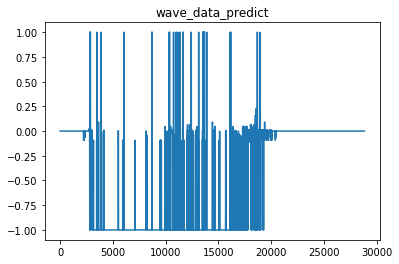

In [33]:
plt.figure(1)
plt.title('wave_data_predict')
plt.plot(values)
plt.show()

In [ ]:
wavfile.write("test.wav", 44100, np.array(values, dtype=np.float32))

In [27]:
np.array(predict).shape

(28814, 2001)

In [28]:
i = np.zeros(2001)
i[0] = 1
print(predict_decode(i))

-1.0


In [42]:
predict[0][3] > predict[0][2000]

True

In [ ]:
wavfile